# spaceNNtime in simulated experiments

In this notebook I run spaceNNtime in a example as a demonstration and later analise other experiments

<a name="Home4"></a>

## Contents

0. [ Library and packages ](#Lib)
1. [ Functions ](#Fun)
    + 1. [Python Functions](#Pyf)
    + 2. [R Functions](#Rfu)
2. [ spaceNNtime results in simulations ](#Exp)
    + 1. [Presentation of experiment simulated data](#Prs)
    + 2. [Allele counts per selected individuals](#All)
    + 3. [Coordinates and sampling time per individual](#Coo)
    + 4. [spaceNNtime on the first set of test individuals](#sNt)
    + 5. [Analise results](#Ana)
    + 6. [Summary results](#Sum)
        - **DOWNSAMPLING EXPERIMENT**
        - 1. [Exp001 : 15,000 randomly uniformally distributed samples ](#001)
        - 2. [Exp002 : 10,000 randomly uniformally distributed samples ](#002)
        - 3. [Exp003 :  5,000 randomly uniformally distributed samples ](#003)
        - 4. [Exp004 :  1,500 randomly uniformally distributed samples ](#004)
        - 5. [Exp005 :  1,000 randomly uniformally distributed samples ](#005)
        - 6. [Exp006 :    500 randomly uniformally distributed samples ](#006)
        - 7. [Exp007 :    250 randomly uniformally distributed samples ](#007)
        - **EXPONENTIALLY SAMPLED (similarly to MesoNeo data)**
        - 8. [Exp008 :  1,500 randmoly exponentially distributed samples ](#008)
        - **SNP DENSITY EXPERIMENT**
        - 9. [Exp009 :  1,500 randmoly uniformally distributed samples with 75% SNP density ](#009)
        - 10. [Exp010 :  1,500 randmoly uniformally distributed samples with 50% SNP density ](#0010)
        - 11. [Exp011 :  1,500 randmoly uniformally distributed samples with 25% SNP density ](#011)
        - 12. [Exp012 :  1,500 randmoly uniformally distributed samples with 15% SNP density ](#012)
        - **TRAINING SPACE AND TIME SEPARATELY**
        - 13. [Exp013 :  1,500 randmoly uniformally distributed samples predicting space only ](#011)
        - 14. [Exp014 :  1,500 randmoly uniformally distributed samples predicting time only ](#012)
    + 7. [Summary results all together](#Tog)
        
<a name="011"></a>
#### L. Exp011 :  1,500 randmoly exponentially distributed samples with 25% SNP density
   
<a name="Lib"></a>
## 0. Library and packages

In [1]:
#import sys
#import pandas as pd
#import numpy as np
#import tskit
#import msprime
#import pyslim
#import yaml

#from rpy2.robjects import r, pandas2ri
#pandas2ri.activate()

#sys.path.append('../scripts/')

#from spacetime_templates import *

%load_ext rpy2.ipython
#pandas2ri.activate()

In [2]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"


In [3]:
%%R
.libPaths(c("/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"))

library(ggplot2)
library(cowplot)
library(tidyverse)
library(stringr)
library(sf)
library(slendr)

options(dplyr.summarise.inform = FALSE)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Linking to GEOS 3.7.2, GDAL 3.0.4, PROJ 6.3.2; sf_use_s2() is TRUE

R[write to console]: You can setup a pre-configured environment with all of slendr's Python
tree-sequence dependencies (Python modules tskit, pyslim, and msprime)
by running the function setup_env().



In [4]:
%%R

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

colors = gg_color_hue(6)
col_pop = c("ALL" = "black",
            "AFR" = colors[1], "OOA" = colors[2], "EHG" = colors[3],
            "ANA" = colors[4], "EUR" = colors[5], "YAM" = colors[6])


In [5]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"
[2] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"                                 



[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Fun"></a>
## 1. Functions

<a name="Pfu"></a>
### A. Python Functions

<a name="Rfu"></a>
### B. R Functions


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Exp"></a>
## 2. spaceNNtime results in simulations

<a name="Prs"></a>
### A. Presentation of experiment simulated data

In the table below, we can check each simulation experiment that has been run, its attributes and running conditions.

In [7]:
%%R

read.csv("../../files/experiments.csv", sep = ";")

      sim exp         nam met   siz  snp   pre    typ cov  err nod mem    que
1  europe   1  downsample   1 15000 1.00  sNNt     gt   0 0.00 256 20g    gpu
2  europe   2  downsample   2 10000 1.00  sNNt     gt   0 0.00 256  8g    gpu
3  europe   3  downsample   3  5000 1.00  sNNt     gt   0 0.00 256  2g normal
4  europe   4        gold   4  1500 1.00  sNNt     gt   0 0.00 256  1g normal
5  europe   5  downsample   5  1000 1.00  sNNt     gt   0 0.00 256  1g normal
6  europe   6  downsample   6   500 1.00  sNNt     gt   0 0.00 256  1g normal
7  europe   7  downsample   7   250 1.00  sNNt     gt   0 0.00 256  1g normal
8  europe   8    sampling   8  real 1.00  sNNt     gt   0 0.00 256  1g normal
9  europe   9 snp_density   4  1500 0.75  sNNt     gt   0 0.00 256  1g normal
10 europe  10 snp_density   4  1500 0.50  sNNt     gt   0 0.00 256  1g normal
11 europe  11 snp_density   4  1500 0.25  sNNt     gt   0 0.00 256  1g normal
12 europe  12 snp_density   4  1500 0.10  sNNt     gt   0 0.00 2


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Ana"></a>
### E. Analise results

For each experiment, there is a `pred.txt` file which contains all necessary information to visualize results:

In [8]:
%%R

read.table("../../sandbox/europe/4/pred.txt", header = T) %>%
    head()

     sim exp  nam   ind typ group index n_snps run_time real_latitude_norm
1 europe   4 gold 41517  gt     0    44   1344 1.445837         -0.3007662
2 europe   4 gold 37861  gt     0   118   1344 1.445837         -2.2769378
3 europe   4 gold  5791  gt     0   511   1344 1.445837          0.6370503
4 europe   4 gold 10238  gt     1   212   1344 1.374194          1.0217549
5 europe   4 gold  6002  gt     1   414   1344 1.374194          0.6836681
6 europe   4 gold 24096  gt     1   812   1344 1.374194         -0.3448682
  real_longitude_norm real_time_norm pred_latitude_norm pred_longitude_norm
1           1.7085160     -1.3749213         -0.3336625           1.5207913
2           0.5755739     -1.1134602         -1.2238423           0.9665417
3          -1.4482014      1.2755702          0.6456226          -0.9670564
4          -0.2458928      0.8816741          1.0126266          -0.2510838
5          -1.1602709      1.2566866         -0.3093041          -0.8683058
6           1.51215

In [26]:
%%R

df  %>% gather("predreal", "value", pred, real) %>% filter(normtrue == "norm") %>% head()

     sim exp nam   ind typ group index n_snps  run_time     stat normtrue pop
1 europe  24  gp 41517  gp     0    44   1500 0.4514285 latitude     norm YAM
2 europe  24  gp 37861  gp     0   118   1500 0.4514285 latitude     norm ANA
3 europe  24  gp  5791  gp     0   511   1500 0.4514285 latitude     norm OOA
4 europe  24  gp 10238  gp     1   212   1500 0.3526652 latitude     norm OOA
5 europe  24  gp  6002  gp     1   414   1500 0.3526652 latitude     norm OOA
6 europe  24  gp 24096  gp     1   812   1500 0.3526652 latitude     norm ANA
        diff predreal       value
1  0.0639564     pred -0.23680983
2  1.6784375     pred -0.59850030
3 -1.2554614     pred -0.61841110
4 -1.1009128     pred -0.07915790
5 -0.5164370     pred  0.16723111
6  0.2567203     pred -0.08814795


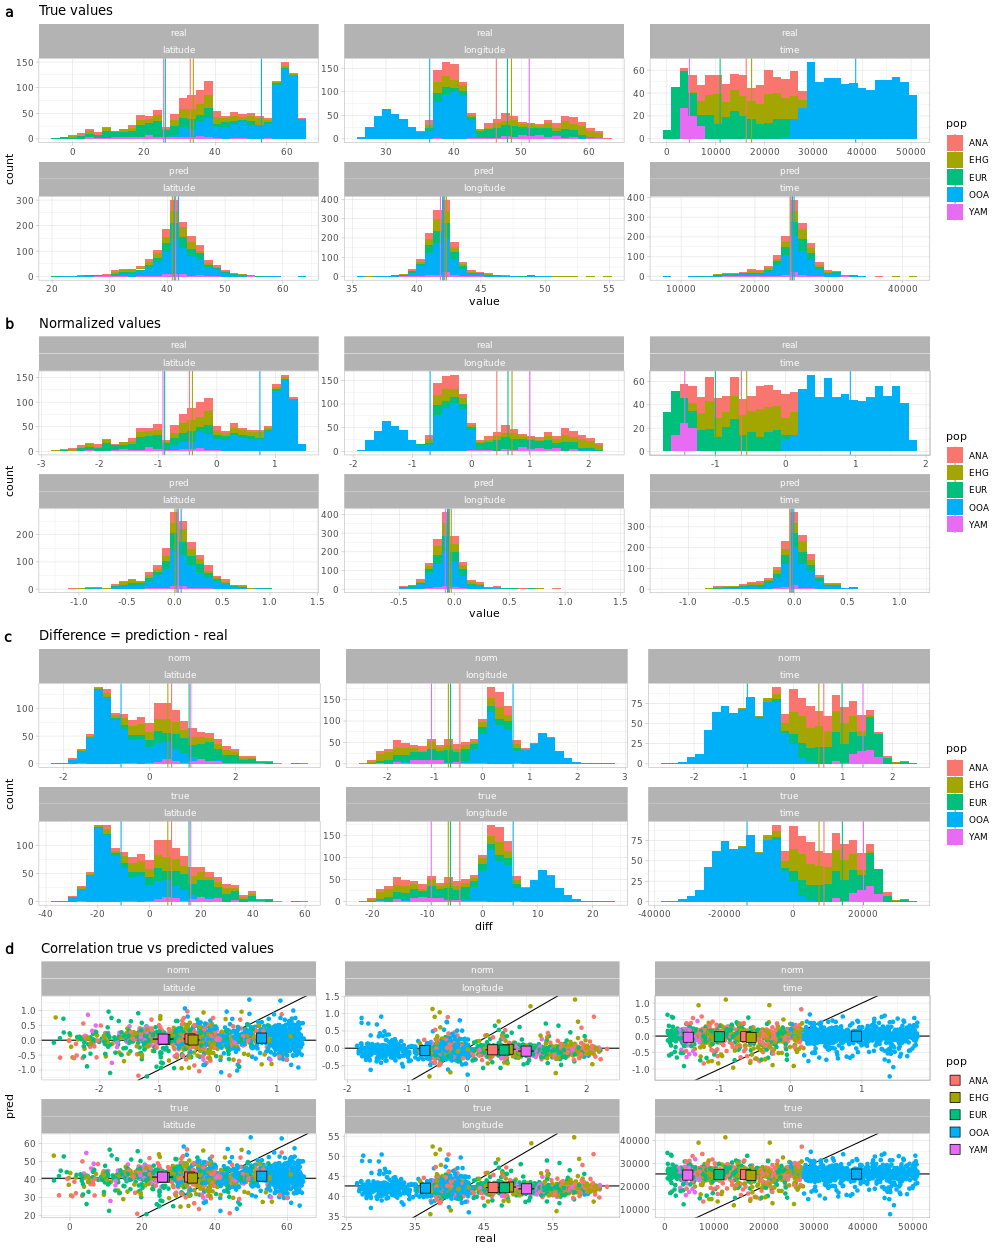

In [41]:
%%R -w 1000 -h 1250

exp = "24"

read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
    rename(real_latitude_true  = real_latitude, 
           real_longitude_true = real_longitude, 
           real_time_true      = real_time,
           pred_latitude_true  = pred_latitude, 
           pred_longitude_true = pred_longitude, 
           pred_time_true      = pred_time) %>%
    filter(abs(real_latitude_norm-pred_latitude_norm) < 10) %>%
    gather(stat, value, 10:21) %>%
    separate(stat, c("realpred", "stat", "normtrue"), sep = "_") %>%
    spread(realpred, value) %>%
    left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    mutate(diff = pred-real) -> df

plot_grid(
    df %>%
        gather("predreal", "value", pred, real) %>%
        filter(normtrue == "true") %>%
        mutate(predreal = factor(predreal, levels = c("real", "pred"))) %>%
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat, predreal) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        facet_wrap(predreal~stat, scales = "free") +
        theme_light() +
        ggtitle("True values"),
    df %>%
        gather("predreal", "value", pred, real) %>%
        filter(normtrue == "norm") %>%
        mutate(predreal = factor(predreal, levels = c("real", "pred"))) %>%
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat, predreal) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        facet_wrap(predreal~stat, scales = "free") +
        theme_light() +
        ggtitle("Normalized values"),
    df %>%
        ggplot() +
        geom_histogram(aes(x = diff, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat, normtrue) %>% summarize(mean = mean(diff)), aes(xintercept = mean, color = pop)) +
        facet_wrap(normtrue~stat, scales = "free") +
        theme_light() +
        ggtitle("Difference = prediction - real"),
    df %>%
        ggplot() +
        geom_abline(slope = 1, intercept = 0) +
        geom_hline(data = . %>% group_by(stat, normtrue) %>% summarize(mean = mean(real)), aes(yintercept = mean)) +
        geom_point(aes(x = real, y = pred, color = pop)) +
        geom_errorbar(data = . %>% group_by(pop, stat, normtrue) %>% summarize(mean_pred = mean(pred), 
                                                                               mean_real = mean(real),
                                                                               se_pred   = 1.96*(sd(pred)/sqrt(n())),
                                                                               se_real   = 1.96*(sd(real)/sqrt(n()))), 
                      aes(x = mean_real, ymin = mean_pred-se_pred, ymax = mean_pred+se_pred)) +
        geom_errorbar(data = . %>% group_by(pop, stat, normtrue) %>% summarize(mean_pred = mean(pred), 
                                                                               mean_real = mean(real),
                                                                               se_pred   = 1.96*(sd(pred)/sqrt(n())),
                                                                               se_real   = 1.96*(sd(real)/sqrt(n()))), 
                      aes(y = mean_pred, xmin = mean_real-se_real, xmax = mean_real+se_real)) +
        geom_point(data = . %>% group_by(pop, stat, normtrue) %>% summarize(mean_pred = mean(pred), 
                                                                            mean_real = mean(real)), 
                   aes(x = mean_real, y = mean_pred, fill = pop), shape = 22, size = 5) +
        facet_wrap(normtrue~stat, scales = "free") +
        theme_light() +
        ggtitle("Correlation true vs predicted values"),
    
    ncol = 1, labels = "auto"
)
    

In [11]:
%%R

df %>% 
    group_by(pop, stat, normtrue) %>% 
    summarize(mean_pred = mean(pred), mean_real = mean(real), mean_diff = mean(diff), sqrtdiff = mean(sqrt(diff^2))) %>%
    filter(normtrue == "true") %>%
    as.data.frame() %>%
    print()

   pop      stat normtrue   mean_pred   mean_real     mean_diff     sqrtdiff
1  ANA  latitude     true    42.48864    32.97351      9.515126    13.485277
2  ANA longitude     true    41.95241    46.30346     -4.351052     7.430717
3  ANA      time     true 25783.34955 16254.31556   9529.033991 10020.662444
4  EHG  latitude     true    41.88546    33.83447      8.050994    13.181231
5  EHG longitude     true    41.94801    48.53850     -6.590493     8.828266
6  EHG      time     true 25628.87629 17357.83621   8271.040082  8746.132573
7  EUR  latitude     true    41.96998    25.98441     15.985566    17.852794
8  EUR longitude     true    42.00341    47.94325     -5.939836     7.413903
9  EUR      time     true 25523.86061 10912.52778  14611.332835 14648.089238
10 OOA  latitude     true    42.23829    52.92172    -10.683427    13.307238
11 OOA longitude     true    41.89863    36.46299      5.435640     5.941197
12 OOA      time     true 25728.84505 38668.64419 -12939.799138 13019.030937

In [92]:
%%R

df %>% 
    group_by(pop, stat, normtrue) %>% 
    summarize(mean_pred = mean(pred), mean_real = mean(real), mean_diff = mean(diff)) %>%
    filter(normtrue == "true") %>%
    as.data.frame() %>%
    print()

`summarise()` has grouped output by 'pop', 'stat'. You can override using the
`.groups` argument.
   pop      stat normtrue   mean_pred   mean_real     mean_diff
1  ANA  latitude     true    29.15817    32.97351    -3.8153459
2  ANA longitude     true    46.63173    46.30346     0.3282671
3  ANA      time     true 11323.43745 16254.31556 -4930.8781022
4  EHG  latitude     true    29.07166    33.83447    -4.7628080
5  EHG longitude     true    47.75949    48.53850    -0.7790134
6  EHG      time     true 11680.26505 17357.83621 -5677.5711565
7  EUR  latitude     true    25.83056    25.98441    -0.1538587
8  EUR longitude     true    48.36635    47.94325     0.4231082
9  EUR      time     true  8637.47084 10912.52778 -2275.0569340
10 OOA  latitude     true    45.44224    52.92172    -7.4794746
11 OOA longitude     true    38.47226    36.46299     2.0092717
12 OOA      time     true 31431.36248 38668.64419 -7237.2817131
13 YAM  latitude     true    25.77224    25.52694     0.2453018
14 YAM

In [15]:
%%R

error_spaceNNtime <- function(sim, exp, pre){
    if(pre %in% c("sNNt", "time")){
        read.table(paste("../../sandbox/", sim,"/", exp,"/pred.txt", sep = ""), header = T) %>%
            select(sim, exp, nam, ind, typ, group, index, real_time, pred_time) %>%
            mutate(time = sqrt((real_time-pred_time)^2)) %>%
            select(-c(real_time, pred_time)) %>%
            arrange(sim, exp, nam, ind, typ, group, index) -> df_diff
    }else if(pre == "space"){
        read.table(paste("../../sandbox/", sim,"/", exp,"/pred.txt", sep = ""), header = T) %>%
            select(sim, exp, nam, ind, typ, group, index) %>%
            arrange(sim, exp, nam, ind, typ, group, index) -> df_diff
    }
    
    if(pre %in% c("sNNt", "space")){
        read.table(paste("../../sandbox/", sim,"/", exp,"/pred.txt", sep = ""), header = T) %>%
            select(sim, exp, nam, ind, typ, group, index, real_latitude, real_longitude, pred_latitude, pred_longitude) %>%
            gather("stat", "value", c(real_latitude, real_longitude, pred_latitude, pred_longitude)) %>%
            separate(stat, c("realpred", "latlon")) %>%
            spread(latlon, value) %>%
            arrange(sim, exp, nam, ind, typ, group, index) %>%
            filter(realpred == "real") %>%
            select("latitude", "longitude") %>%
            st_as_sf(coords = c("latitude", "longitude"), crs = 4326) -> real_coor

        read.table(paste("../../sandbox/", sim,"/", exp,"/pred.txt", sep = ""), header = T) %>%
            select(sim, exp, nam, ind, typ, group, index, real_latitude, real_longitude, pred_latitude, pred_longitude) %>%
            gather("stat", "value", c(real_latitude, real_longitude, pred_latitude, pred_longitude)) %>%
            separate(stat, c("realpred", "latlon")) %>%
            spread(latlon, value) %>%
            arrange(sim, exp, nam, ind, typ, group, index) %>%
            filter(realpred == "pred") %>%
            select("latitude", "longitude") %>%
            st_as_sf(coords = c("latitude", "longitude"), crs = 4326) -> pred_coor
        
        df_diff %>%
            mutate(space = as.numeric(sf::st_distance(real_coor, pred_coor, by_element = TRUE))/1e3) -> df_diff
        
    }
    
    if(pre == "sNNt"){
        df_diff %>%
            gather("stat", "value", c(space, time)) -> df_diff
    }else if(pre == "space"){
        df_diff %>%
            mutate(stat = "space") %>%
            rename(value = space) -> df_diff
    }else if(pre == "time"){
        df_diff %>%
            mutate(stat = "time") %>%
            rename(value = time) -> df_diff
    }
    df_diff %>%
        left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) 
}


    
error_spaceNNtime(sim = "europe", exp = "1", pre = "sNNt") %>%
    head()

     sim exp        nam ind typ group index  stat      value pop
1 europe   1 downsample 128  gt    16  2778 space  1312.4727 OOA
2 europe   1 downsample 167  gt   415  7547 space   355.7227 OOA
3 europe   1 downsample 189  gt   309 11301 space  1805.7892 OOA
4 europe   1 downsample 249  gt   405  5510 space  1078.7284 OOA
5 europe   1 downsample 296  gt   139  2835 space 13109.1881 OOA
6 europe   1 downsample 297  gt   311 10234 space   243.1052 OOA


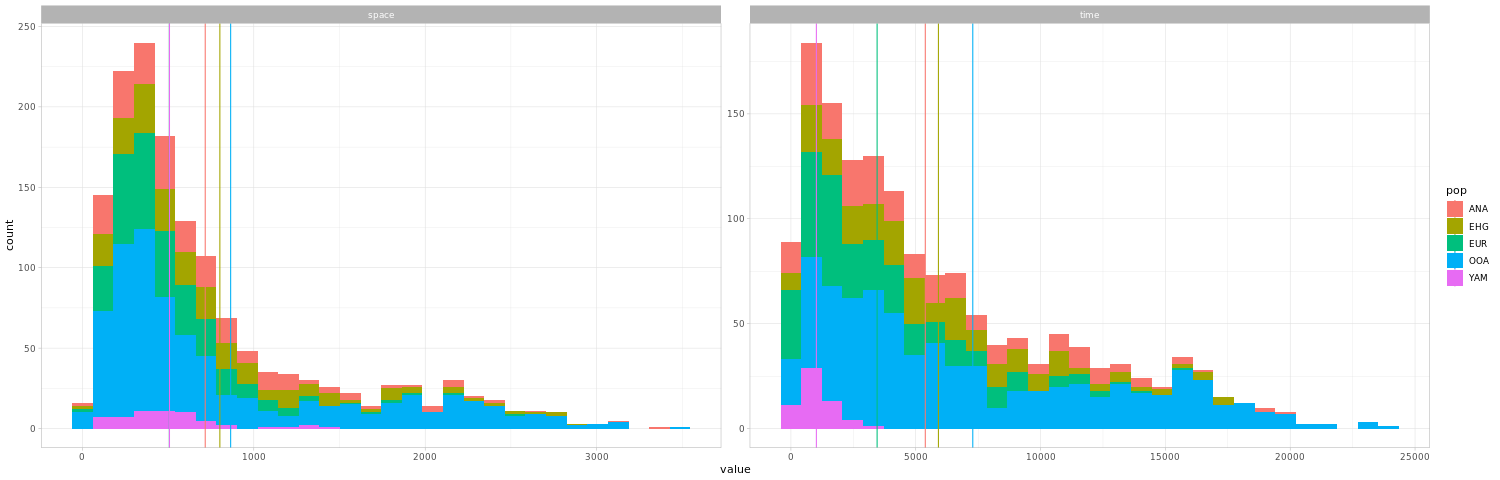

In [16]:
%%R -w 1500

error_spaceNNtime(sim = "europe", exp = 4, pre = "sNNt") %>%
    ggplot() +
    geom_histogram(aes(x = value, fill = pop), bins = 30) +
    geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
    facet_wrap(.~stat, scales = "free") +
    theme_light()

In [17]:
%%R

error_spaceNNtime_all_scenarios_per_pop <- function(){
    read.csv("../../files/experiments.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(14)){
        print(i)
        sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              error_spaceNNtime(sim, exp, pre) %>%
                                  group_by(sim, exp, nam, typ, stat, pop) %>%
                                  summarize(mean = mean(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios_per_pop <- error_spaceNNtime_all_scenarios_per_pop()
head(all_scenarios_per_pop)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
# A tibble: 6 × 8
# Groups:   sim, exp, nam, typ, stat [2]
  sim    exp   nam        typ   stat  pop    mean    se
  <chr>  <fct> <chr>      <chr> <chr> <chr> <dbl> <dbl>
1 europe 1     downsample gt    space ANA    622.  32.4
2 europe 1     downsample gt    space EHG    722.  46.0
3 europe 1     downsample gt    space EUR    539.  23.6
4 europe 1     downsample gt    space OOA   1167.  73.2
5 europe 1     downsample gt    space YAM    531.  62.9
6 europe 1     downsample gt    time  ANA   4535. 206. 


In [19]:
%%R

error_spaceNNtime_all_scenarios_all <- function(){
    read.csv("../../files/experiments.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(14)){
        print(i)
        sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              error_spaceNNtime(sim, exp, pre) %>%
                                  group_by(sim, exp, nam, typ, stat) %>%
                                  summarize(mean = mean(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios_all <- error_spaceNNtime_all_scenarios_all()
head(all_scenarios_all)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
# A tibble: 6 × 7
# Groups:   sim, exp, nam, typ [3]
  sim    exp   nam        typ   stat      mean        se
  <chr>  <fct> <chr>      <chr> <chr>    <dbl>     <dbl>
1 europe 1     downsample gt    space     876.      36.8
2 europe 1     downsample gt    time  1675284. 1315248. 
3 europe 2     downsample gt    space     708.      16.7
4 europe 2     downsample gt    time     6479.    1280. 
5 europe 3     downsample gt    space     642.      15.3
6 europe 3     downsample gt    time     3885.      90.9


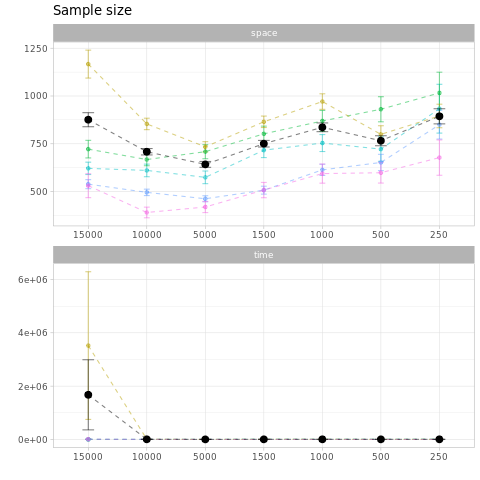

In [22]:
%%R

plot_errors <- function(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, title, xlab, ylab, nolegend = TRUE){
    
    ggplot() +
        geom_errorbar(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = pop), alpha = 0.5, width = 0.1) +
        geom_line(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop),
                   aes(x = exp, y = mean, color = pop, group = pop), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop),
                   aes(x = exp, y = mean, color = pop), alpha = 0.5) +
        geom_errorbar(data = all_scenarios_all %>% filter(exp %in% exp_to_plot),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = "ALL"), alpha = 0.5, width = 0.2) +
        geom_line(data = all_scenarios_all %>% filter(exp %in% exp_to_plot),
                   aes(x = exp, y = mean, color = "ALL", group = "ALL"), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_all %>% filter(exp %in% exp_to_plot),
                   aes(x = exp, y = mean, color = "ALL"), size = 3) +
        labs(title=title, x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        scale_color_manual(values=col_pop) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme_light() -> plot 
    if(nolegend){
        plot + theme(legend.position = 'none')
    }else{
        plot
    }
}

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) -> p1

p1

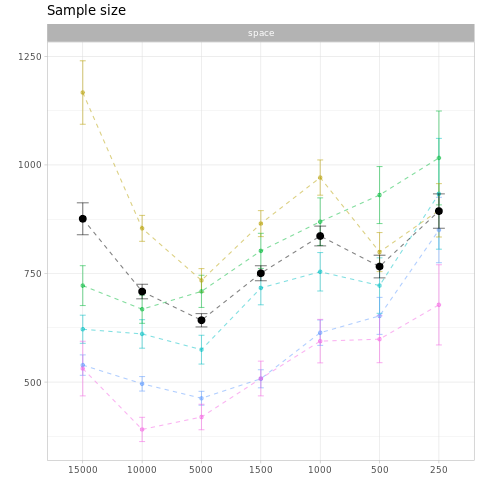

In [242]:
%%R

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop %>% filter(stat == "space"), all_scenarios_all %>% filter(stat == "space"), 
            filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) +
    theme(axis.title.x=element_blank())-> p1a

p1a

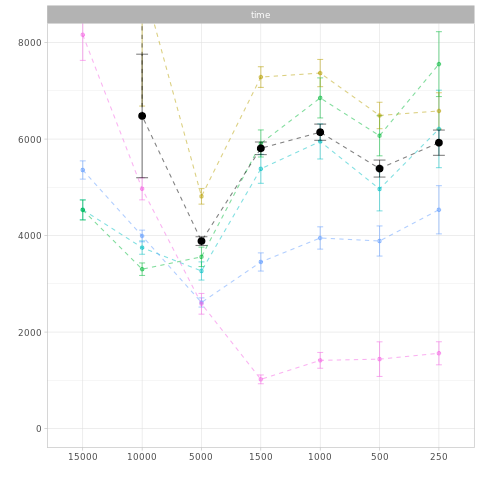

In [247]:
%%R

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop %>% filter(stat == "time"), all_scenarios_all %>% filter(stat == "time"), 
            filter_pop, exp_to_plot, labels, limits, "", "", "", TRUE) + coord_cartesian(ylim = c(0, 8e3)) +
    theme(plot.title = element_blank())-> p1b

p1b

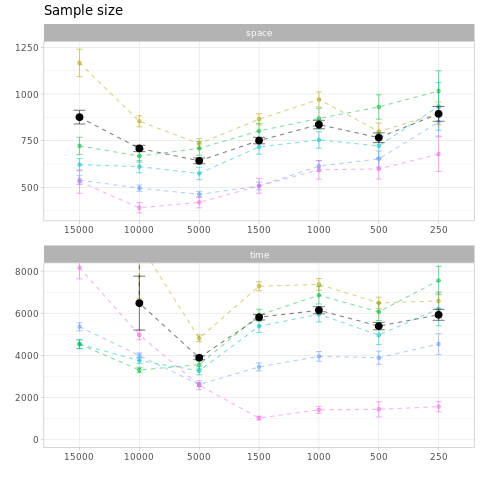

In [248]:
%%R

plot_grid(p1a, p1b, nrow = 2) -> p1
p1

In [23]:
%%R

filter_pop  = c()
exp_to_plot = c(4, 8)
labels      = c("4" = "unif", "8" = "exp")
limits      = c("4", "8")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampling", "", "", TRUE) -> p2

filter_pop  = c()
exp_to_plot = c(4, 9, 10, 11, 12)
labels      = c("4" = "100%", "9" = "75%", "10" = "50%", "11" = "25%", "12" = "10%")
limits      = c("4", "9", "10", "11", "12")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", TRUE) -> p3

filter_pop  = c()
exp_to_plot = c(4, 13, 14)
labels      = c("4" = "sNNt", "13" = "space", "14" = "time")
limits      = c()
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Prediction", "", "", TRUE) -> p4

filter_pop  = c()
exp_to_plot = c(4, 15, 16, 17)
labels      = c("4" = "GT", "15" = "5x", "16" = "15x", "17" = "30x")
limits      = c("4", "15", "16", "17")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "", TRUE) -> p5

filter_pop  = c()
exp_to_plot = c(4, 21, 22, 23)
labels      = c("4" = "GT", "21" = "5x", "22" = "15x", "23" = "30x")
limits      = c("4", "21", "22", "23")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", TRUE) -> p6

filter_pop  = c()
exp_to_plot = c(4, 24, 25, 26)
labels      = c("4" = "GT", "24" = "5x", "25" = "15x", "26" = "30x")
limits      = c("4", "24", "25", "26")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits,  "Coverage (GP)", "", "", TRUE) -> p7

filter_pop  = c()
exp_to_plot = c(18, 19, 4, 20)
labels      = c("18" = "64", "19" = "128", "4" = "256", "20" = "512")
limits      = c("18", "19", "4", "20")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes per hidden layer (10)", "", "") -> p8

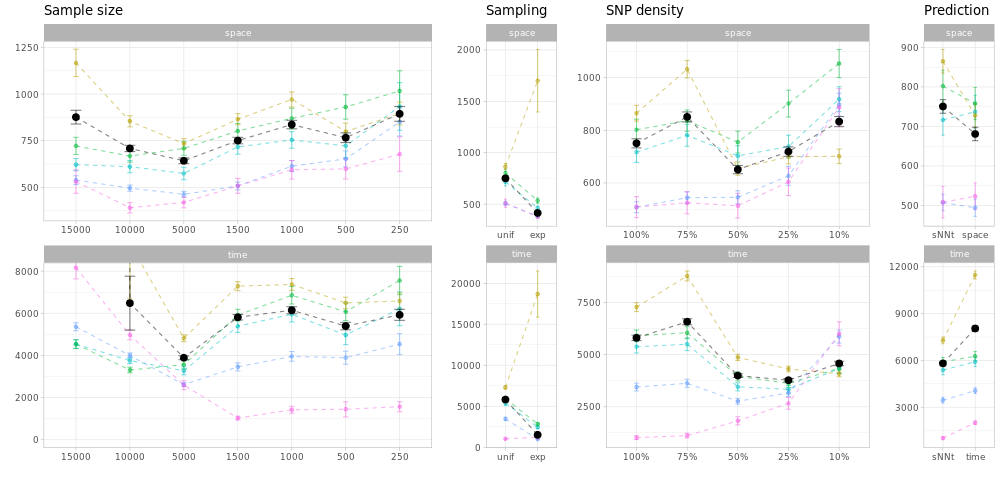

In [251]:
%%R -w 1000

plot_grid(p1, p2, p3, p4, nrow = 1, rel_widths = c(7, 2, 5, 2))

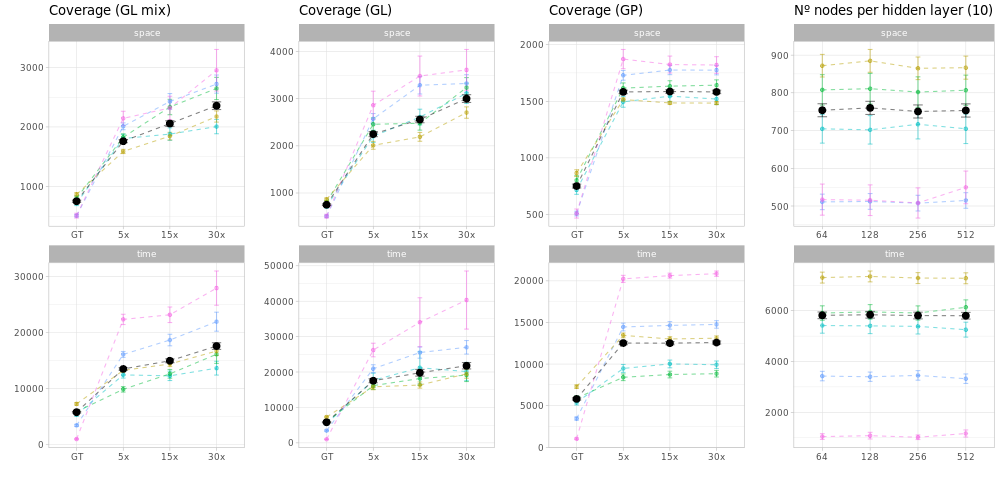

In [24]:
%%R -w 1000

plot_grid(p5, p6, p7, p8, nrow = 1, rel_widths = c(4, 4, 4))

In [33]:
metadata = pd.read_csv("../sandbox/europe/spaceNNtime/exp004/metadata.csv")

In [11]:
%%R

read.table("../sandbox/europe/spaceNNtime/exp004/pred.txt", header = T) %>% head()

  samples input_type group index n_snps real_latitude_norm real_longitude_norm
1   28407         ac     0   497  14697         -0.7030956          1.01757709
2   35609         ac     0   691  14697         -0.6158790          0.48611126
3   25098         ac     0   850  14697         -0.2867506          2.22975211
4   39845         ac     1   612  14697         -2.0709359          0.13402068
5   11091         ac     1  1300  14697          0.9663866          0.59399209
6   30967         ac     1  1361  14697         -1.3257620         -0.04656989
  real_time_norm pred_latitude_norm pred_longitude_norm pred_time_norm
1     -0.7205354         -1.0304663          0.93058640     -1.2927850
2     -1.2873466         -1.0255271          0.97547346     -1.4763215
3     -0.4541541         -1.2509553          0.99190015     -1.2996020
4     -1.6678913         -1.3337917         -0.05856339     -1.6288284
5      0.6734598          0.9823139          0.37762362      0.2481415
6     -0.9248277     

In [14]:
%%R -i metadata

read.table("../sandbox/europe/spaceNNtime/exp004/pred.txt", header = T) %>% 
    gather( "stat", "value", 6:length(names(.))) %>%
    #filter(str_detect(stat, "norm", negate = FALSE)) %>%
    separate(stat, c("realpred", "stat", "norm"), sep = "_") %>%
    mutate(norm = ifelse(is.na(norm), 0, 1)) %>%
    #select(-c(norm)) %>%
    spread(realpred, value) %>%
    left_join(metadata %>% select(samples = inid, pop = popu), by = c("samples")) %>%
    mutate(pop = ifelse(pop == 2, "OOA", ifelse(pop == 3, "EHG", ifelse(pop == 4, "ANA", ifelse(pop == 5, "EUR", "YAM")))))-> predictions
    
predictions %>% head()

  samples input_type group index n_snps      stat norm        pred
1      74         ac    45    17  14697  latitude    0  605.296940
2      74         ac    45    17  14697  latitude    1    0.729286
3      74         ac    45    17  14697 longitude    0  152.751000
4      74         ac    45    17  14697 longitude    1   -1.165875
5      74         ac    45    17  14697      time    0 1460.393300
6      74         ac    45    17  14697      time    1    1.182976
           real pop
1  493.96683299 OOA
2   -0.08115606 OOA
3   60.23084574 OOA
4   -2.11374015 OOA
5 1697.00000000 OOA
6    1.65686731 OOA


In [15]:
%%R

lr_stats = data.frame()

for(s in unique(predictions$stat)){
    m        <- predictions %>% 
                    #filter(pop != "OOA") %>% 
                    filter(stat == s) %>% 
                    lm(formula = pred~real)
    lr_stats <- rbind(lr_stats, data.frame(stat      = s,
                                           intercept = round(m$coefficients[1], digits = 3), 
                                           slope     = round(m$coefficients[2], digits = 3), 
                                           r_sqrt    = round(summary(m)$adj.r.squared, digits = 3)))
    
}
rownames(lr_stats) <- NULL

lr_stats

       stat intercept slope r_sqrt
1  latitude     6.477 0.890  0.926
2 longitude    23.746 0.904  0.850
3      time   -11.741 0.777  0.949


R[write to console]: `geom_smooth()` using formula 'y ~ x'



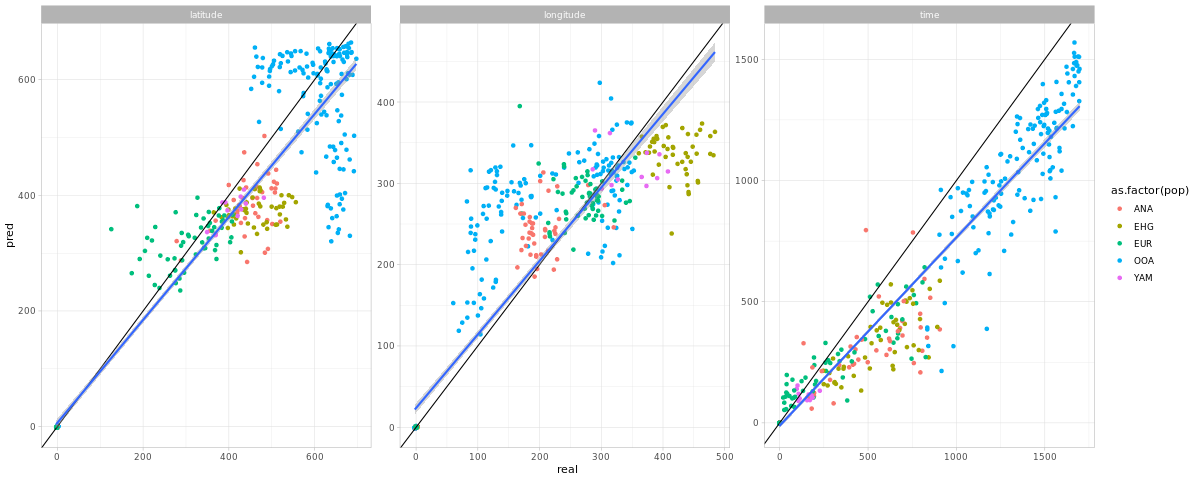

In [16]:
%%R -w 1200

predictions %>%
    #filter(pop != "OOA") %>%
    ggplot(aes(x = real, y = pred)) +
    geom_point(aes(color = as.factor(pop))) +
    geom_abline(intercept = 0, slope = 1) +
    geom_smooth(method = "lm") +
    facet_wrap(.~stat, scales = "free") +
    theme_light()

In [17]:
%%R -w 1000

predictions %>% head()

  samples input_type group index n_snps      stat norm        pred
1      74         ac    45    17  14697  latitude    0  605.296940
2      74         ac    45    17  14697  latitude    1    0.729286
3      74         ac    45    17  14697 longitude    0  152.751000
4      74         ac    45    17  14697 longitude    1   -1.165875
5      74         ac    45    17  14697      time    0 1460.393300
6      74         ac    45    17  14697      time    1    1.182976
           real pop
1  493.96683299 OOA
2   -0.08115606 OOA
3   60.23084574 OOA
4   -2.11374015 OOA
5 1697.00000000 OOA
6    1.65686731 OOA


`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



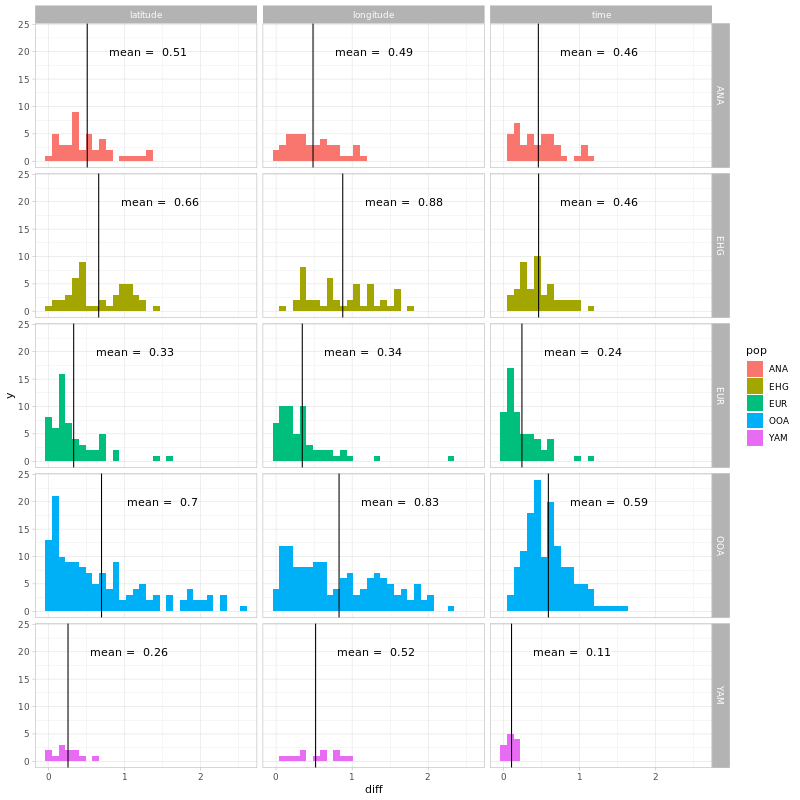

In [18]:
%%R -w 800 -h 800

predictions %>%
    filter(norm == 1) %>%
    mutate(diff = sqrt((pred-real)^2)) %>%
    ggplot(aes(x = diff)) +
    geom_histogram(aes(fill = pop)) +
    geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(diff)), aes(xintercept = mean)) +
    geom_text( data = . %>% group_by(pop, stat) %>% summarize(mean = mean(diff)), aes(x = mean+0.8, y = 20, label = paste("mean = ", round(mean, digits = 2)))) +
    facet_grid(pop~stat) +
    theme_light()

In [26]:
%%R

model <- read("/maps/projects/racimolab/people/qxz396/spaceNNtime/sandbox/europe/slendr")
crs   <- sf::st_crs(model$world)

In [27]:
%%R

predictions %>% 
    filter(stat %in% c("latitude", "longitude"), norm == 0) %>% 
    select(-norm) %>%
    gather("realpred", "value", pred, real) %>%
    spread(stat, value) %>%
    rename(raster_x = longitude, raster_y = latitude) %>%
    reproject(coords = ., from = "raster", to = crs,  model = model, input_prefix = "raster_", output_prefix = "", add = TRUE) %>% 
    select(-raster_y, -raster_x) %>%
    st_as_sf(., coords = c("x", "y"), crs = crs) %>%
    as.data.frame() %>%
    spread(realpred, geometry) %>% 
    group_by(samples) %>%
    mutate(dist_Km = as.numeric(st_distance(pred, real)[[1]]/1000)) %>%
    ungroup() -> space_predictions

    
print(space_predictions %>% head())
print("printing the dataframe alone gives an error If I don't print this... :)")

# A tibble: 6 × 9
  samples input_type group index n_snps pop                pred
    <int> <chr>      <int> <int>  <int> <chr>       <POINT [m]>
1      74 ac            45    17  14697 OOA   (3172919 6165431)
2     115 ac             7  1067  14697 OOA   (3599081 6330043)
3     117 ac            87   540  14697 OOA   (4034842 6395382)
4     139 ac            71   603  14697 OOA   (2932853 6007328)
5     192 ac            32   478  14697 OOA   (3363200 6345176)
6     243 ac            64   933  14697 OOA   (2993655 6058243)
# … with 2 more variables: real <POINT [m]>, dist_Km <dbl>
[1] "printing the dataframe alone gives an error If I don't print this... :)"


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



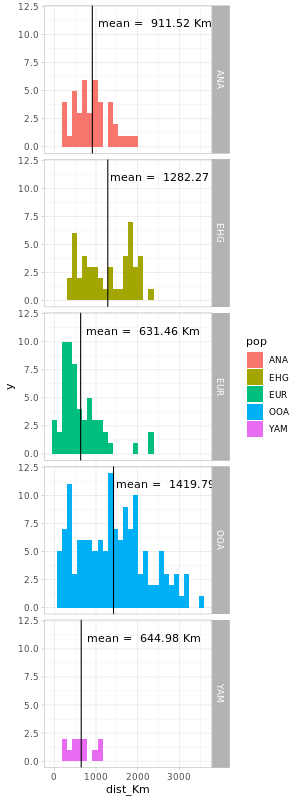

In [28]:
%%R -w 300 -h 800

space_predictions %>%
    ggplot(aes(x = dist_Km)) +
    geom_histogram(aes(fill = pop)) +
    geom_vline(data = . %>% group_by(pop) %>% summarize(mean = mean(dist_Km)), aes(xintercept = mean)) +
    geom_text( data = . %>% group_by(pop) %>% summarize(mean = mean(dist_Km)), aes(x = mean + 1500, y = 11, label = paste("mean = ", round(mean, digits = 2), "Km"))) +
    facet_grid(pop~.) +
    theme_light()
    
# print("hola")

In [29]:
%%R

predictions %>%
    filter(stat == "time", norm == 0) %>%
    select(-norm, -stat) %>% 
    mutate(pred = slendr:::convert_slim_time(pred, model),
           real = slendr:::convert_slim_time(real, model),
           diff_years = abs(real-pred)) -> time_predictions
    
head(time_predictions)

  samples input_type group index n_snps  pred  real pop diff_years
1      74         ac    45    17  14697 43811 50910 OOA       7099
2     115         ac     7  1067  14697 42165 50850 OOA       8685
3     117         ac    87   540  14697 39825 50850 OOA      11025
4     139         ac    71   603  14697 45305 50820 OOA       5515
5     192         ac    32   478  14697 43499 50730 OOA       7231
6     243         ac    64   933  14697 45343 50640 OOA       5297


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



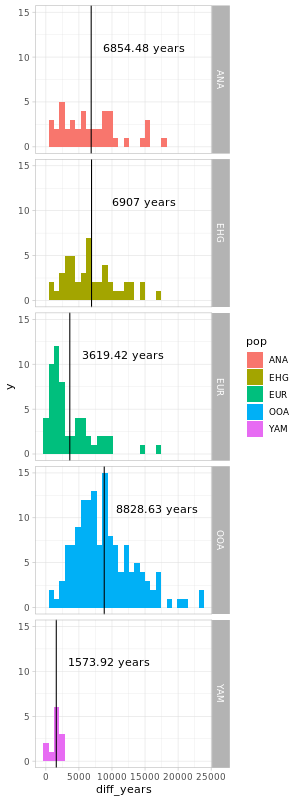

In [30]:
%%R -w 300 -h 800

time_predictions %>%
    ggplot(aes(x = diff_years)) +
    geom_histogram(aes(fill = pop)) +
    geom_vline(data = . %>% group_by(pop) %>% summarize(mean = mean(diff_years)), aes(xintercept = mean)) +
    geom_text( data = . %>% group_by(pop) %>% summarize(mean = mean(diff_years)), aes(x = mean + 8000, y = 11, label = paste(round(mean, digits = 2), "years"))) +
    facet_grid(pop~.) +
    theme_light()

Joining, by = "samples"


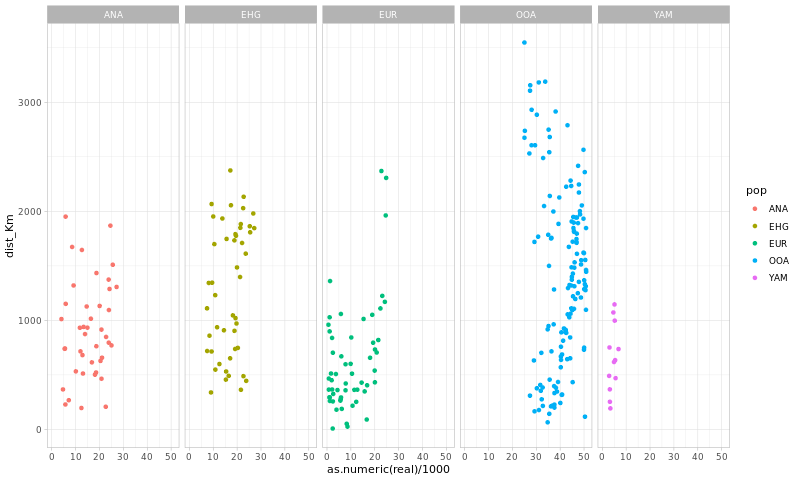

In [31]:
%%R -w 800

time_predictions %>%
    left_join(space_predictions %>% select(samples, dist_Km)) %>%
    ggplot() +
    geom_point(aes(x = as.numeric(real)/1000, y = dist_Km, color = pop)) +
    facet_wrap(.~pop, nrow = 1) +
    theme_light()

Joining, by = "samples"


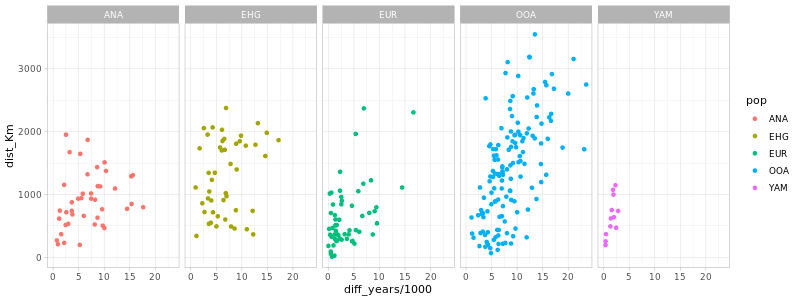

In [32]:
%%R -w 800 -h 300

time_predictions %>%
    left_join(space_predictions %>% select(samples, dist_Km)) %>%
    ggplot() +
    geom_point(aes(x = diff_years/1000, y = dist_Km, color = pop)) +
    facet_wrap(.~pop, nrow = 1) +
    theme_light()


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Sum"></a>
### F. Summary results

<a name="001"></a>
#### A. Exp001 : 15,000 randomly uniformally distributed samples

In [61]:
with open("../sandbox/europe/spaceNNtime/exp001/exp001.yaml", 'r') as tra_val_tes_file:
    a = yaml.load(tra_val_tes_file, Loader=yaml.FullLoader)

print(len(a[0]["tra"]))
print(len(a[0]["val"]))
print(len(a[0]["tes"]))

13444
1495
3


       stat intercept slope r_sqrt
1  latitude     7.374 0.906  0.942
2 longitude     8.921 0.900  0.896
3      time    48.173 0.902  0.929
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


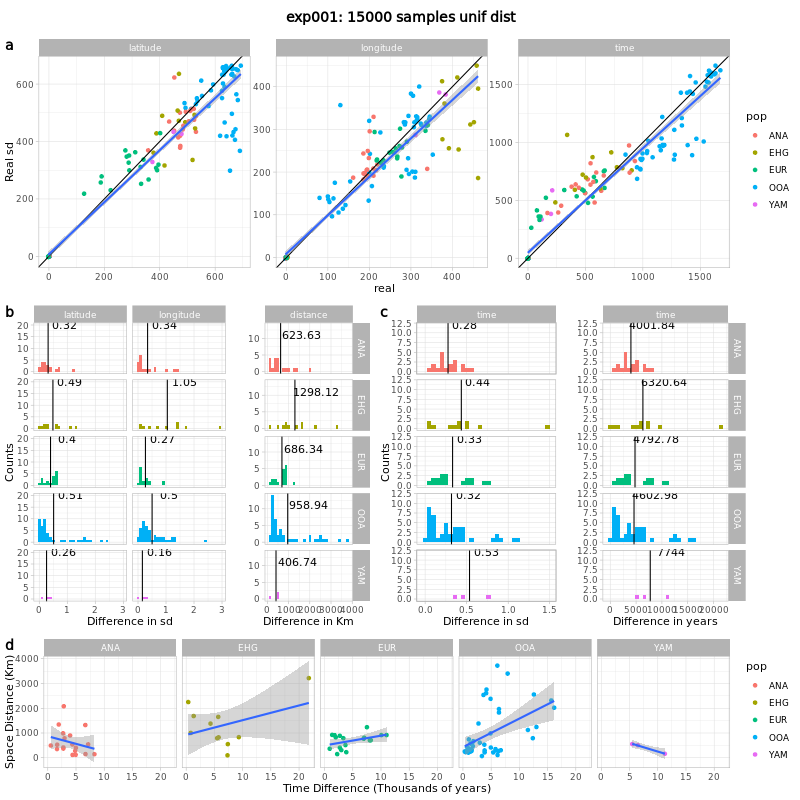

In [62]:
%%R -w 800 -h 800

summary_plots("001", "15000 samples unif dist")

<a name="002"></a>
#### B. Exp002 : 10,000 randomly uniformally distributed samples

In [63]:
with open("../sandbox/europe/spaceNNtime/exp002/exp002.yaml", 'r') as tra_val_tes_file:
    a = yaml.load(tra_val_tes_file, Loader=yaml.FullLoader)

print(len(a[0]["tra"]))
print(len(a[0]["val"]))
print(len(a[0]["tes"]))

8997
1000
3


       stat intercept slope r_sqrt
1  latitude     7.596 0.880  0.839
2 longitude     9.341 0.842  0.856
3      time    31.134 0.868  0.887
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


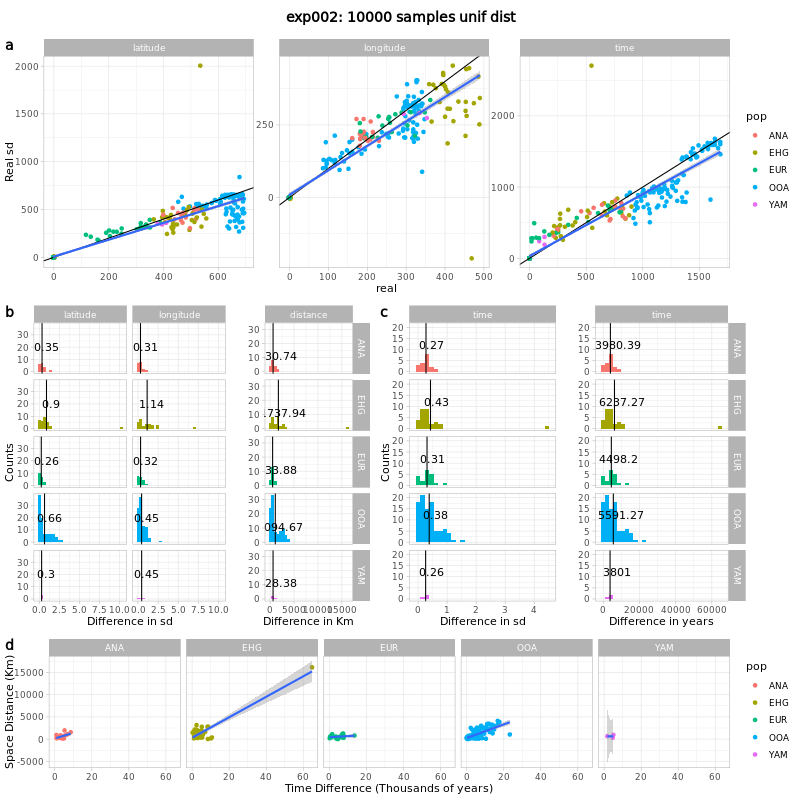

In [64]:
%%R -w 800 -h 800

summary_plots("002", "10000 samples unif dist")

<a name="003"></a>
#### C. Exp003 :  5,000 randomly uniformally distributed samples

In [65]:
with open("../sandbox/europe/spaceNNtime/exp003/exp003.yaml", 'r') as tra_val_tes_file:
    a = yaml.load(tra_val_tes_file, Loader=yaml.FullLoader)

print(len(a[0]["tra"]))
print(len(a[0]["val"]))
print(len(a[0]["tes"]))

4497
500
3


       stat intercept slope r_sqrt
1  latitude     8.689 0.879  0.945
2 longitude     6.889 0.889  0.939
3      time    14.412 0.863  0.937
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


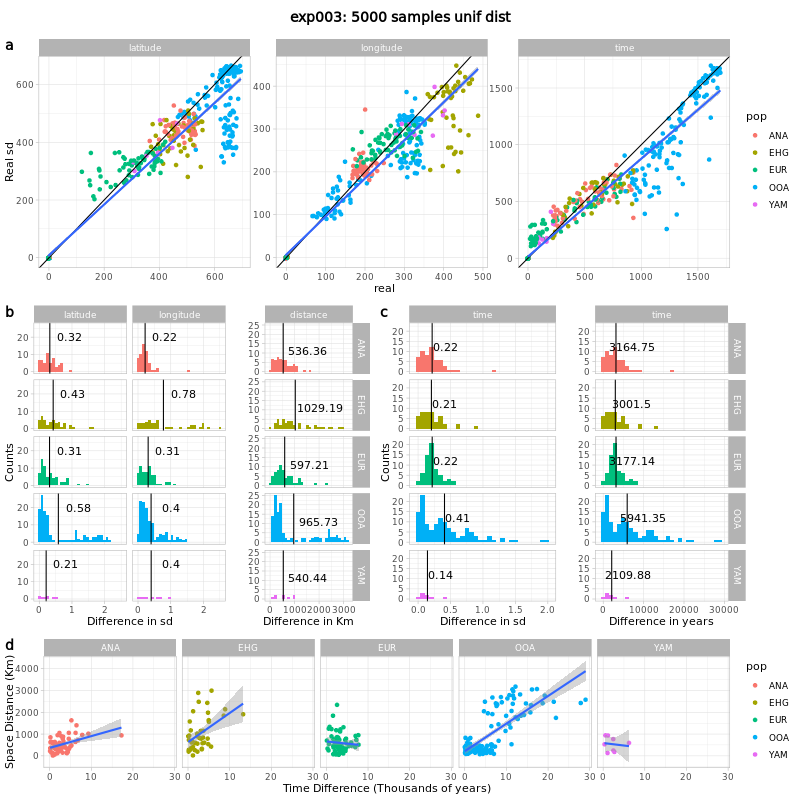

In [66]:
%%R -w 800 -h 800

summary_plots("003", "5000 samples unif dist")

<a name="004"></a>
#### D. Exp004 :  1,500 randomly uniformally distributed samples

In [67]:
with open("../sandbox/europe/spaceNNtime/exp004/exp004.yaml", 'r') as tra_val_tes_file:
    a = yaml.load(tra_val_tes_file, Loader=yaml.FullLoader)

print(len(a[0]["tra"]))
print(len(a[0]["val"]))
print(len(a[0]["tes"]))

1347
150
3


       stat intercept slope r_sqrt
1  latitude    10.375 0.862  0.946
2 longitude     7.770 0.885  0.949
3      time   -13.209 0.843  0.934
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


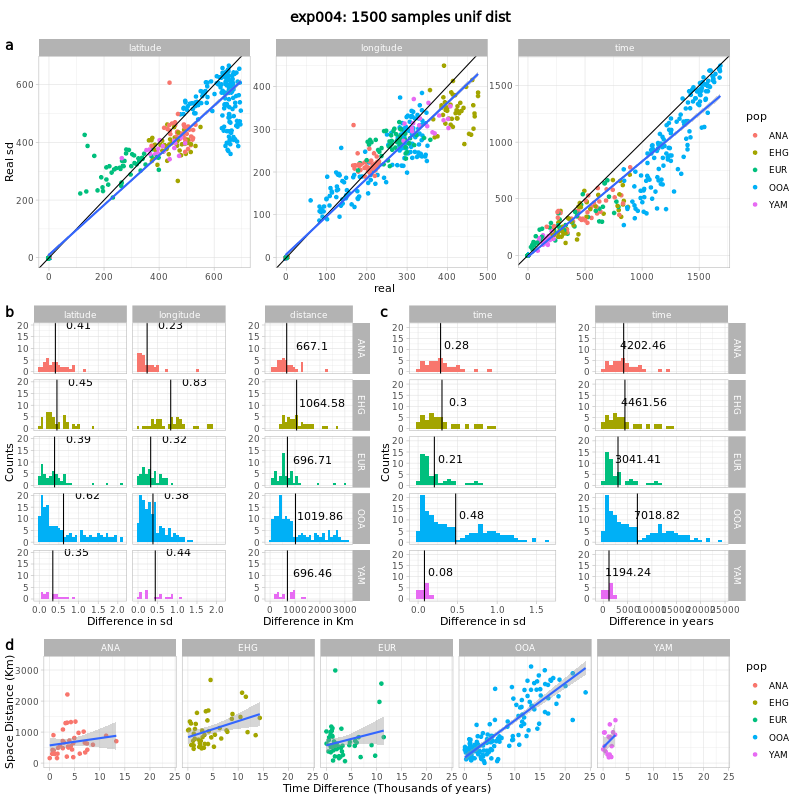

In [68]:
%%R -w 800 -h 800

summary_plots("004", "1500 samples unif dist")

<a name="005"></a>
#### E. Exp005 :  1,000 randomly uniformally distributed samples

In [69]:
with open("../sandbox/europe/spaceNNtime/exp005/exp005.yaml", 'r') as tra_val_tes_file:
    a = yaml.load(tra_val_tes_file, Loader=yaml.FullLoader)

print(len(a[0]["tra"]))
print(len(a[0]["val"]))
print(len(a[0]["tes"]))

897
100
3


       stat intercept slope r_sqrt
1  latitude     6.404 0.852  0.936
2 longitude     9.810 0.926  0.934
3      time   -23.517 0.863  0.939
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


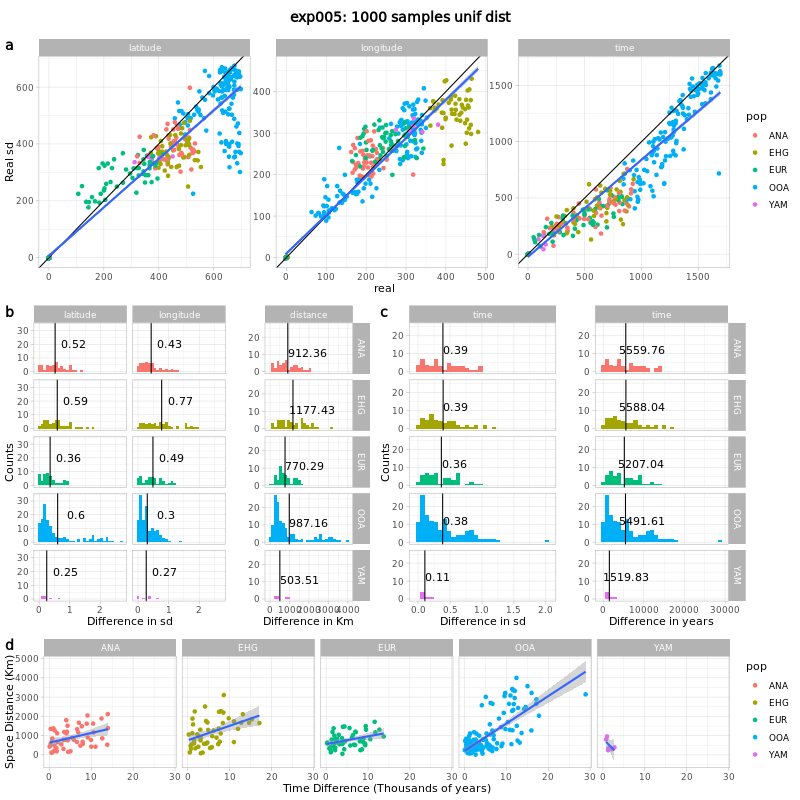

In [70]:
%%R -w 800 -h 800

summary_plots("005", "1000 samples unif dist")

<a name="006"></a>
#### F. Exp006 :    500 randomly uniformally distributed samples

In [71]:
with open("../sandbox/europe/spaceNNtime/exp006/exp006.yaml", 'r') as tra_val_tes_file:
    a = yaml.load(tra_val_tes_file, Loader=yaml.FullLoader)

print(len(a[0]["tra"]))
print(len(a[0]["val"]))
print(len(a[0]["tes"]))

447
50
3


       stat intercept slope r_sqrt
1  latitude    11.495 0.824  0.932
2 longitude     9.121 0.845  0.925
3      time   -19.700 0.828  0.918
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


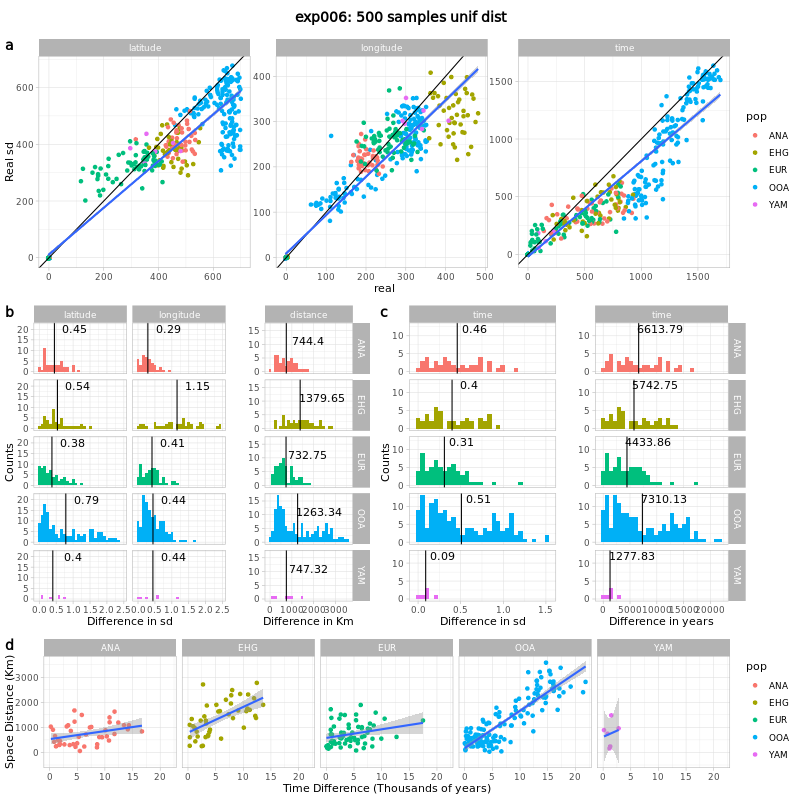

In [72]:
%%R -w 800 -h 800

summary_plots("006", "500 samples unif dist")

<a name="007"></a>
#### G. Exp007 :    250 randomly uniformally distributed samples

In [73]:
with open("../sandbox/europe/spaceNNtime/exp007/exp007.yaml", 'r') as tra_val_tes_file:
    a = yaml.load(tra_val_tes_file, Loader=yaml.FullLoader)

print(len(a[0]["tra"]))
print(len(a[0]["val"]))
print(len(a[0]["tes"]))

222
25
3


       stat intercept slope r_sqrt
1  latitude    13.204 0.880  0.941
2 longitude    11.271 0.966  0.921
3      time   -15.711 0.798  0.904
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


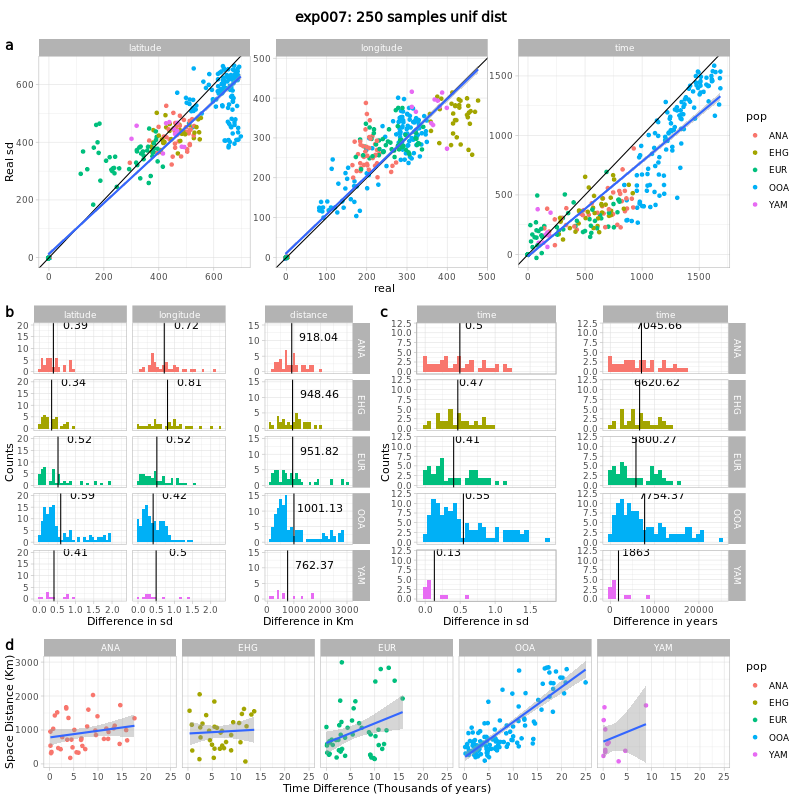

In [74]:
%%R -w 800 -h 800

summary_plots("007", "250 samples unif dist")

<a name="008"></a>
#### H. Exp008 :  1,500 randmoly exponentially distributed samples

       stat intercept slope r_sqrt
1  latitude     8.558 0.936  0.969
2 longitude     5.890 0.983  0.971
3      time    15.653 0.575  0.819
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


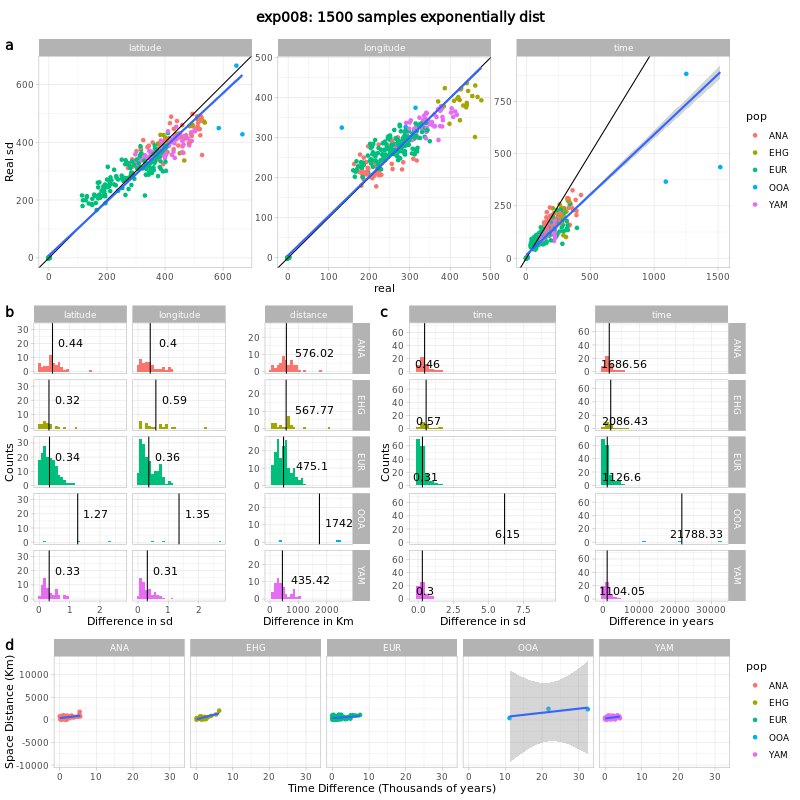

In [75]:
%%R -w 800 -h 800

summary_plots("008", "1500 samples exponentially dist")

<a name="009"></a>
#### I. Exp009 :  1,500 randmoly exponentially distributed samples with 75% SNP density

In [76]:
pd.read_table("../sandbox/europe/spaceNNtime/exp004/pred.txt")["n_snps"][1]

1378

In [77]:
pd.read_table("../sandbox/europe/spaceNNtime/exp009/pred.txt")["n_snps"][1]

1018

       stat intercept slope r_sqrt
1  latitude     9.874 0.855  0.945
2 longitude     8.302 0.887  0.938
3      time   -12.722 0.826  0.931
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


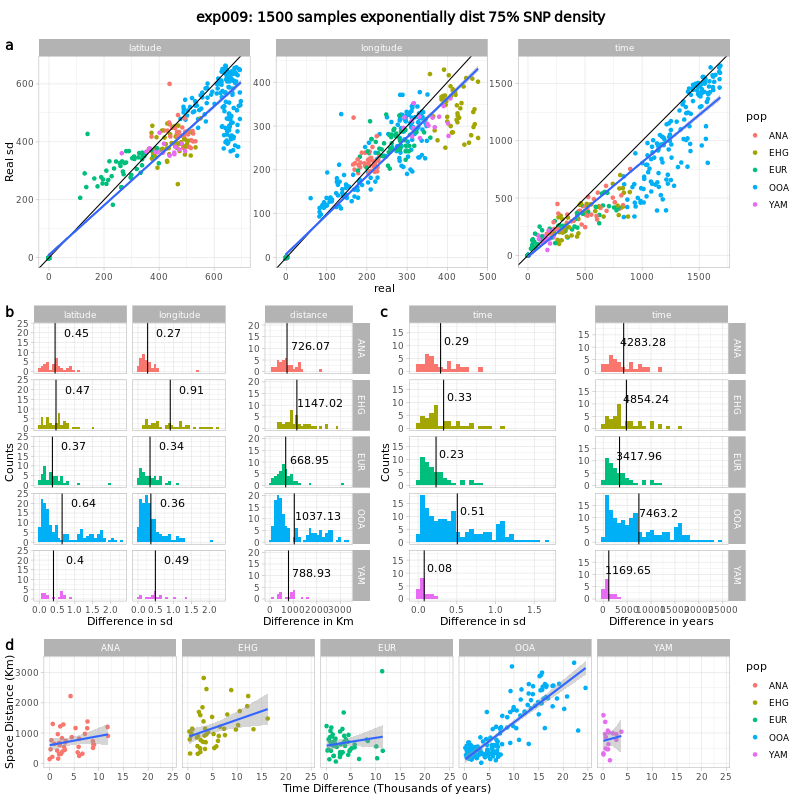

In [78]:
%%R -w 800 -h 800

summary_plots("009", "1500 samples exponentially dist 75% SNP density")

<a name="010"></a>
#### J. Exp010 :  1,500 randmoly exponentially distributed samples with 50% SNP density

In [79]:
pd.read_table("../sandbox/europe/spaceNNtime/exp010/pred.txt")["n_snps"][1]

697

       stat intercept slope r_sqrt
1  latitude    11.773 0.836  0.929
2 longitude     7.947 0.892  0.939
3      time    -9.682 0.839  0.926
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


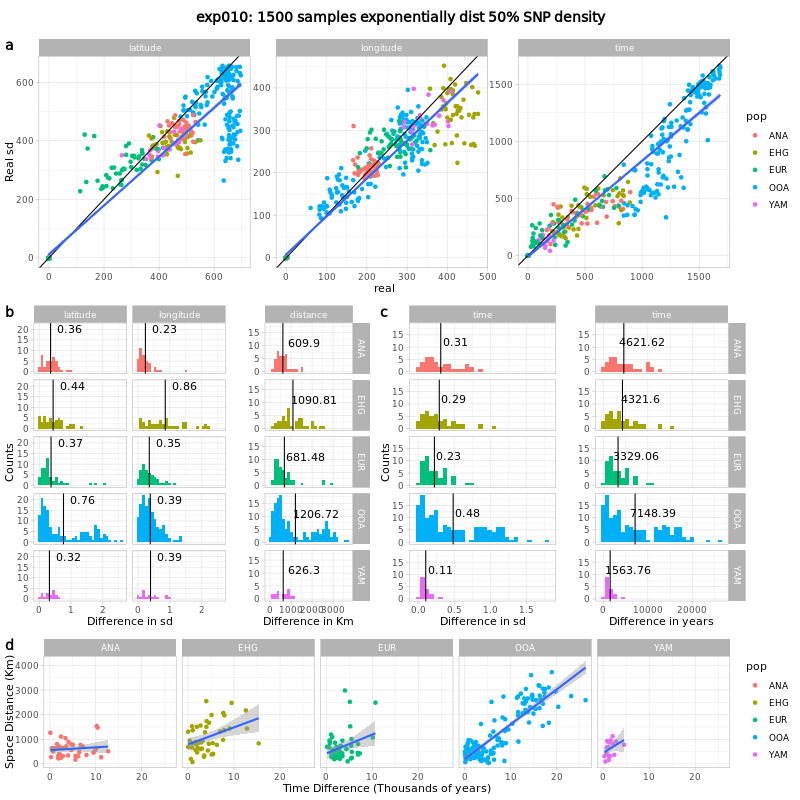

In [80]:
%%R -w 800 -h 800

summary_plots("010", "1500 samples exponentially dist 50% SNP density")

<a name="011"></a>
#### K. Exp011 :  1,500 randmoly exponentially distributed samples with 25% SNP density

In [81]:
pd.read_table("../sandbox/europe/spaceNNtime/exp011/pred.txt")["n_snps"][1]

360

       stat intercept slope r_sqrt
1  latitude    11.221 0.856  0.931
2 longitude     7.054 0.973  0.937
3      time    17.732 0.883  0.944
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


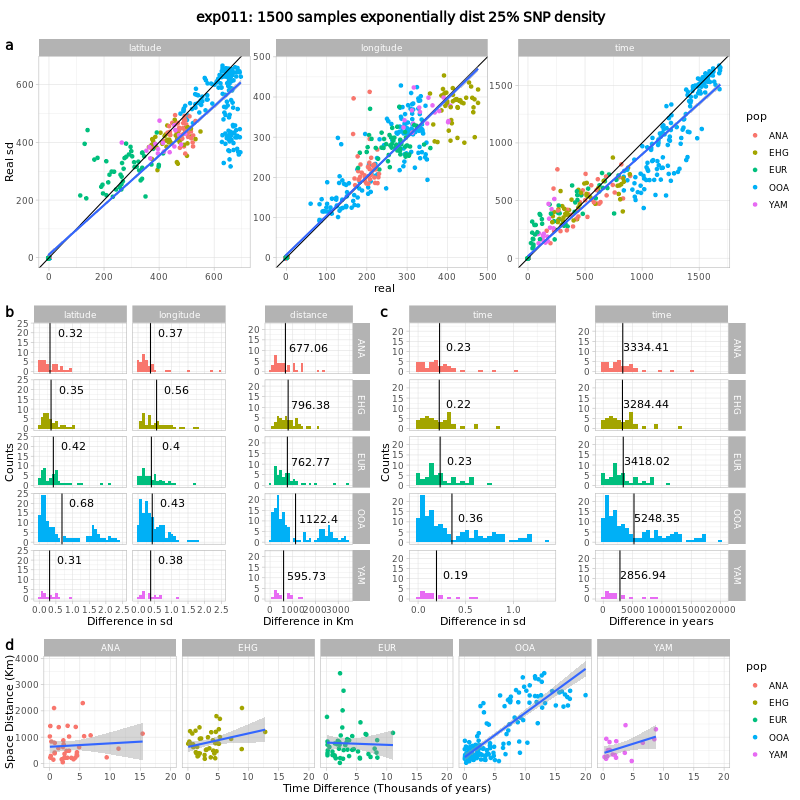

In [82]:
%%R -w 800 -h 800

summary_plots("011", "1500 samples exponentially dist 25% SNP density")

<a name="012"></a>
#### L. Exp012 :  1,500 randmoly exponentially distributed samples with 10% SNP density

In [83]:
pd.read_table("../sandbox/europe/spaceNNtime/exp012/pred.txt")["n_snps"][1]

144

       stat intercept slope r_sqrt
1  latitude    16.038 0.844  0.912
2 longitude    10.903 0.943  0.903
3      time     6.757 0.765  0.866
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


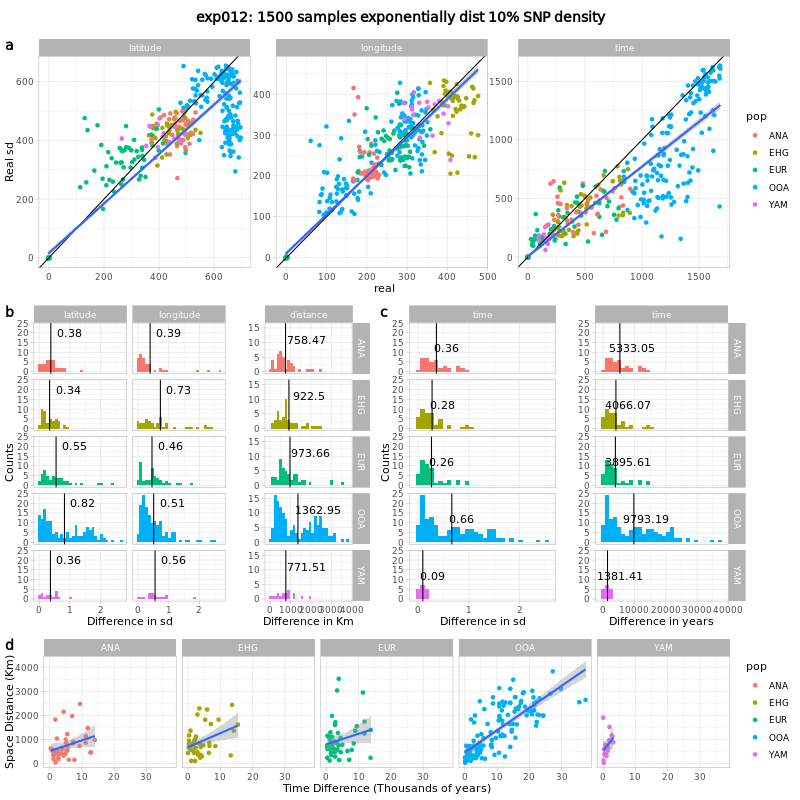

In [84]:
%%R -w 800 -h 800

summary_plots("012", "1500 samples exponentially dist 10% SNP density")

<a name="013"></a>
#### M. Exp013 :  1,500 randmoly uniformally distributed samples predicting space only

       stat intercept slope r_sqrt
1  latitude     8.981 0.853  0.943
2 longitude     7.563 0.892  0.949
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


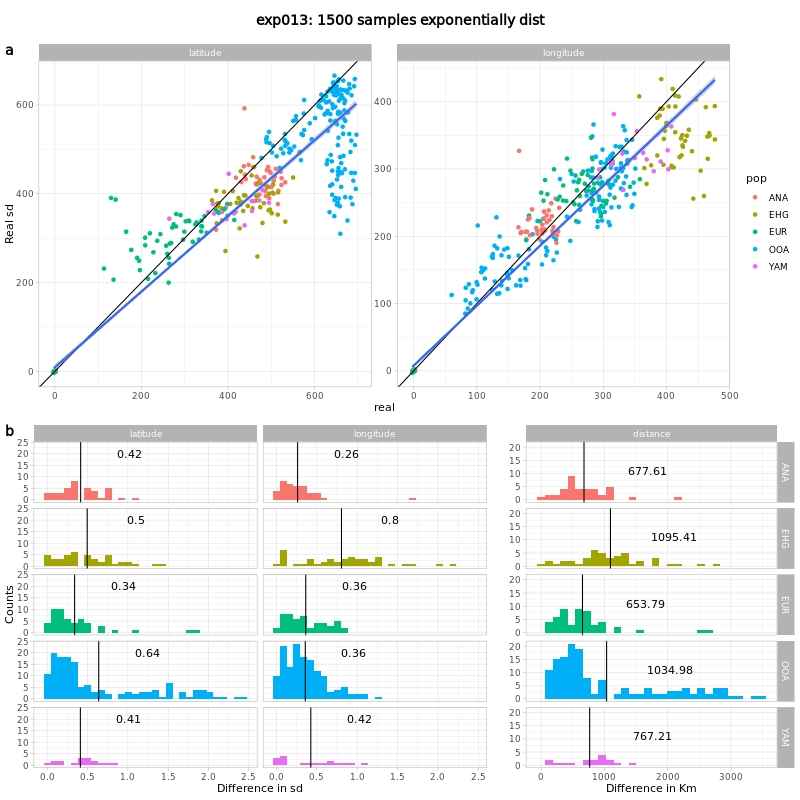

In [88]:
%%R -w 800 -h 800

summary_plots("013", "1500 samples exponentially dist", "space")

<a name="014"></a>
#### N. Exp014 :  1,500 randmoly uniformally distributed samples predicting time only

  stat intercept slope r_sqrt
1 time    -2.846 0.768  0.904
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.


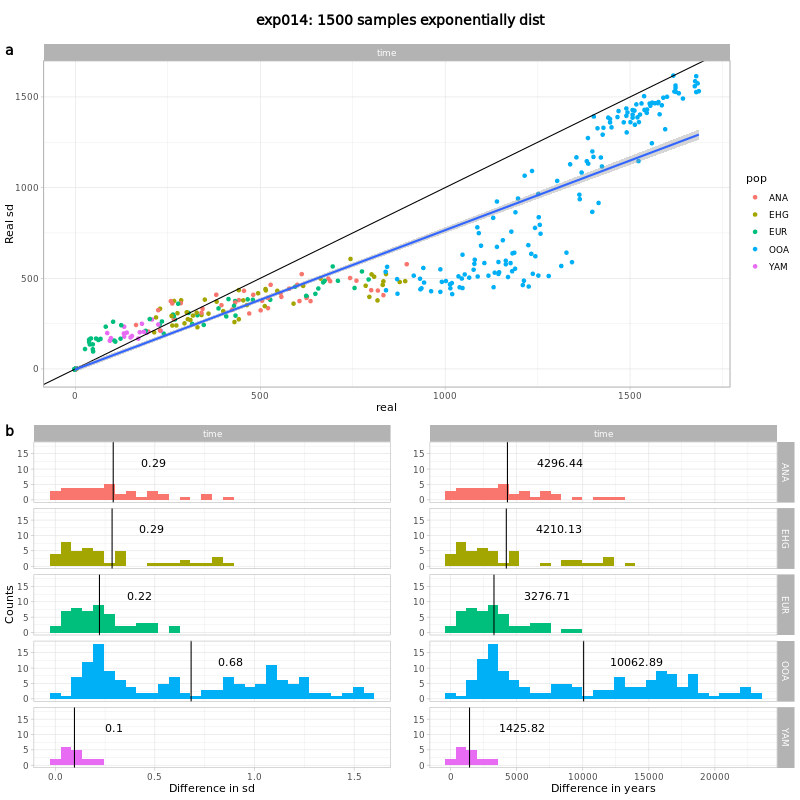

In [89]:
%%R -w 800 -h 800

summary_plots("014", "1500 samples exponentially dist", "time")


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Tog"></a>
### G. Summary results all together



In [5]:
%%R

get_time_and_space_predictions <- function(exp, n_ind, ys){
    metadata    = read.table(paste("../sandbox/europe/spaceNNtime/exp", exp,"/metadata.csv", sep = ""), header = T, sep = ",")
    predictions = read.table(paste("../sandbox/europe/spaceNNtime/exp", exp,"/pred.txt", sep = ""), header = T)
    
    if(ys %in% c("spaceNNtime", "space")){
        predictions = predictions %>% filter(pred_latitude_norm < 50, pred_longitude_norm < 50)
    }    
    if(ys %in% c("spaceNNtime", "time")){
        predictions = predictions %>% filter(pred_time_norm < 50) 
    }
    
    predictions = predictions %>%
                            gather( "stat", "value", 6:length(names(.))) %>%
                            separate(stat, c("realpred", "stat", "norm"), sep = "_") %>%
                            mutate(norm = ifelse(is.na(norm), 0, 1)) %>%
                            spread(realpred, value) %>%
                            left_join(metadata %>% select(ind = inid, pop = popu), by = c("ind")) %>%
                            mutate(pop = ifelse(pop == 2, "OOA", ifelse(pop == 3, "EHG", ifelse(pop == 4, "ANA", ifelse(pop == 5, "EUR", "YAM")))))
    
    model = read("/maps/projects/racimolab/people/qxz396/spaceNNtime/sandbox/europe/slendr")
    crs   = sf::st_crs(model$world)
    #print(names(model))
    ###############################################
    model$path = ""

    if(ys %in% c("spaceNNtime", "time")){
            time_predictions = predictions %>%
                                    filter(stat == "time", norm == 0) %>%
                                    select(-norm, -stat) %>% 
                                    mutate(pred       = slendr:::convert_slim_time(pred, model),
                                           real       = slendr:::convert_slim_time(real, model),
                                           diff_years = abs(real-pred)) 
    }
    #####################################
    if(ys %in% c("spaceNNtime", "space")){
            space_predictions = predictions %>% 
                                    filter(stat %in% c("latitude", "longitude"), norm == 0) %>% 
                                    select(-norm) %>%
                                    gather("realpred", "value", pred, real) %>%
                                    spread(stat, value) %>%
                                    rename(raster_x = longitude, raster_y = latitude) %>%
                                    reproject(coords = ., from = "raster", to = crs,  model = model, input_prefix = "raster_", output_prefix = "", add = TRUE) %>% 
                                    select(-raster_y, -raster_x) %>%
                                    st_as_sf(., coords = c("x", "y"), crs = crs) %>%
                                    as.data.frame() %>%
                                    spread(realpred, geometry) %>% 
                                    group_by(ind) %>%
                                    mutate(dist_Km = as.numeric(st_distance(pred, real)[[1]]/1000)) %>%
                                    ungroup()
        
    }
    #####################################
    #print("hola")
    if(ys == "spaceNNtime"){
        time_predictions %>%
            rename(time_pred = pred, time_real = real) %>%
            left_join(space_predictions %>% select(ind, space_pred = pred, space_real = real, dist_Km), by = c("ind")) %>% 
            mutate(exp = as.numeric(exp), n_ind = n_ind) %>%
            select(ind, index, pop, input_type, exp, group, n_ind, n_snps, space_real, space_pred, dist_Km, time_real, time_pred, diff_years)
    }else if(ys == "space"){
        space_predictions %>%
            rename(space_pred = pred, space_real = real) %>%
            mutate(time_real = NA, time_pred = NA, diff_years = NA, exp = as.numeric(exp), n_ind = n_ind) %>%
            select(ind, index, pop, input_type, exp, group, n_ind, n_snps, space_real, space_pred, dist_Km, time_real, time_pred, diff_years)
    }else if(ys == "time"){
        time_predictions %>%
            rename(time_pred = pred, time_real = real) %>%
            mutate(space_real = NA, space_pred = NA, dist_Km = NA, exp = as.numeric(exp), n_ind = n_ind) %>%
            select(ind, index, pop, input_type, exp, group, n_ind, n_snps, space_real, space_pred, dist_Km, time_real, time_pred, diff_years)
            
    }
}

In [6]:
%%R

get_time_and_space_predictions(exp_name, filter(exp_meta, exp == exp_name) %>% pull(n_ind), filter(exp_meta, exp == exp_name) %>% pull(sNt))

R[write to console]: Error in paste("../sandbox/europe/spaceNNtime/exp", exp, "/metadata.csv",  : 
  object 'exp_name' not found




Error in paste("../sandbox/europe/spaceNNtime/exp", exp, "/metadata.csv",  : 
  object 'exp_name' not found


RInterpreterError: Failed to parse and evaluate line '\nget_time_and_space_predictions(exp_name, filter(exp_meta, exp == exp_name) %>% pull(n_ind), filter(exp_meta, exp == exp_name) %>% pull(sNt))\n'.
R error message: 'Error in paste("../sandbox/europe/spaceNNtime/exp", exp, "/metadata.csv",  : \n  object \'exp_name\' not found'

In [10]:
%%R

all_data = data.frame()
exp_meta = data.frame(exp   = str_pad(1:20, 3, pad = "0"), 
                      n_ind = c(15000, 1000, 5000, 1500, 1000, 500, 250, rep(1500, 13)), 
                      sNt   = c(rep("spaceNNtime", 12), "space", "time", rep("spaceNNtime", 6)),
                      data_type = c(rep("ac", 14), rep("gl", 3), rep("ac", 3)),
                      width = c(rep(256, 17), 256/4, 256/2, 256*2))

for(ex in 1:20){
    exp_name      = str_pad(ex, 3, pad = "0")
    print(paste(exp_name, filter(exp_meta, exp == exp_name) %>% pull(n_ind), filter(exp_meta, exp == exp_name) %>% pull(sNt)), sep = " ")
    all_data = rbind(all_data, get_time_and_space_predictions(exp_name, filter(exp_meta, exp == exp_name) %>% pull(n_ind), filter(exp_meta, exp == exp_name) %>% pull(sNt)))
}

print(all_data %>% head())
print("ok")

[1] "001 15000 spaceNNtime"
[1] "002 1000 spaceNNtime"
[1] "003 5000 spaceNNtime"
[1] "004 1500 spaceNNtime"
[1] "005 1000 spaceNNtime"
[1] "006 500 spaceNNtime"
[1] "007 250 spaceNNtime"
[1] "008 1500 spaceNNtime"
[1] "009 1500 spaceNNtime"
[1] "010 1500 spaceNNtime"
[1] "011 1500 spaceNNtime"
[1] "012 1500 spaceNNtime"
[1] "013 1500 space"
[1] "014 1500 time"
[1] "015 1500 spaceNNtime"
[1] "016 1500 spaceNNtime"
[1] "017 1500 spaceNNtime"
[1] "018 1500 spaceNNtime"
[1] "019 1500 spaceNNtime"
[1] "020 1500 spaceNNtime"
   ind index pop input_type exp group n_ind n_snps              space_real
1  596   198 OOA         ac   1    55 15000   3749 POINT (2463027 4782855)
2  597   199 OOA         ac   1    25 15000   3749 POINT (2746515 5043560)
3  788   257 OOA         ac   1    54 15000   3749 POINT (2242660 5001139)
4  877   292 OOA         ac   1    35 15000   3749 POINT (2849263 5124698)
5 1029   355 OOA         ac   1    58 15000   3749 POINT (2346909 5097460)
6 1265   438 OOA        

In [11]:
%%R

all_data %>% select(-c(space_real, space_pred, time_real, time_pred)) -> all_data_nopredreal
all_data_nopredreal %>% head()

   ind index pop input_type exp group n_ind n_snps   dist_Km diff_years
1  596   198 OOA         ac   1    55 15000   3749  504.4575       1657
2  597   199 OOA         ac   1    25 15000   3749  277.3710       1537
3  788   257 OOA         ac   1    54 15000   3749  849.2846       2048
4  877   292 OOA         ac   1    35 15000   3749  104.3268        971
5 1029   355 OOA         ac   1    58 15000   3749 1054.2231       3784
6 1265   438 OOA         ac   1    69 15000   3749  681.3524       2752


In [12]:
all_data_nopredreal = r["all_data_nopredreal"]
df = all_data_nopredreal[["ind", "pop", "exp", "dist_Km", "diff_years"]].to_numpy()
df

array([[596, 'OOA', 1.0, 504.45752733815704, 1657],
       [597, 'OOA', 1.0, 277.37103600112613, 1537],
       [788, 'OOA', 1.0, 849.2846466777842, 2048],
       ...,
       [45301, 'EUR', 20.0, 756.7246833766512, 3029],
       [45306, 'EUR', 20.0, 790.7558612452351, 1672],
       [45453, 'EUR', 20.0, 558.0400603846422, 3239]], dtype=object)

In [29]:
%%time

def bootstrap(a, r = 10000):
    means = []
    for i in range(r):
        means.append(np.random.choice(a, size=a.shape[0], replace=True).mean())
    return np.mean(means), np.std(means)

expes = []
popus = []
stats = []
means = []
sters = []

stat_d = {3 : "dist_Km",
          4 : "diff_years"}

for e in range(1, 21):
    for s in [3, 4]:
        if not (e == 13 and s == 4) and not (e == 14 and s == 3):
            print(e, stat_d[s])
            mean, se = bootstrap(df[(df[:, 2] == e), s])
            expes.append(e)
            popus.append("ALL")
            stats.append(stat_d[s])
            means.append(mean)
            sters.append(se)
            for p in ["OOA", "EHG", "ANA", "EUR", "YAM"]:
                mean, se = bootstrap(df[(df[:, 2] == e)*(df[:, 1] == p), s])
                expes.append(e)
                popus.append(p)
                stats.append(stat_d[s])
                means.append(mean)
                sters.append(se)
            
mean_err = pd.DataFrame({"exp"  : expes,
                         "pop"  : popus,
                         "stat" : stats,
                         "mean" : means,
                         "se"   : sters})

mean_err

1 dist_Km
1 diff_years
2 dist_Km
2 diff_years
3 dist_Km
3 diff_years
4 dist_Km
4 diff_years
5 dist_Km
5 diff_years
6 dist_Km
6 diff_years
7 dist_Km
7 diff_years
8 dist_Km
8 diff_years
9 dist_Km
9 diff_years
10 dist_Km
10 diff_years
11 dist_Km
11 diff_years
12 dist_Km
12 diff_years
13 dist_Km
14 diff_years
15 dist_Km
15 diff_years
16 dist_Km
16 diff_years
17 dist_Km
17 diff_years
18 dist_Km
18 diff_years
19 dist_Km
19 diff_years
20 dist_Km
20 diff_years
CPU times: user 49.5 s, sys: 188 ms, total: 49.6 s
Wall time: 49.6 s


exp  pop        stat         mean          se
0      1  ALL     dist_Km   785.005366   51.061069
1      1  OOA     dist_Km   846.627900   87.568763
2      1  EHG     dist_Km  1039.704612  163.619858
3      1  ANA     dist_Km   578.038189   76.242251
4      1  EUR     dist_Km   704.666839   58.900969
..   ...  ...         ...          ...         ...
223   20  OOA  diff_years  7326.431888  541.801205
224   20  EHG  diff_years  4284.529758  527.291587
225   20  ANA  diff_years  4359.433826  507.149957
226   20  EUR  diff_years  3122.286567  333.635300
227   20  YAM  diff_years  1201.120959  254.464516

[228 rows x 5 columns]

In [30]:
%%R -i mean_err

mean_err %>% head()

  exp pop    stat      mean        se
0   1 ALL dist_Km  785.0054  51.06107
1   1 OOA dist_Km  846.6279  87.56876
2   1 EHG dist_Km 1039.7046 163.61986
3   1 ANA dist_Km  578.0382  76.24225
4   1 EUR dist_Km  704.6668  58.90097
5   1 YAM dist_Km  456.5046 103.21235


In [15]:
%%R

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

colors = gg_color_hue(6)
col_pop = c("AFR" = colors[1], "OOA" = colors[2], "EHG" = colors[3],
            "ANA" = colors[4], "EUR" = colors[5], "YAM" = colors[6], "ALL" = "black")

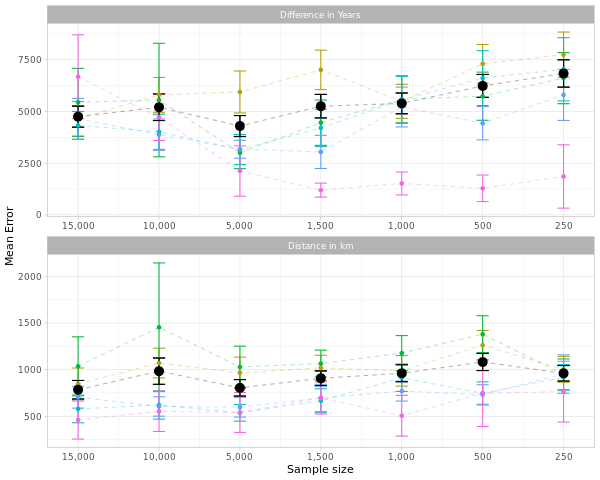

In [16]:
%%R -w 600

mean_err %>%
    filter(exp < 8) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = exp, y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15, show.legend = FALSE) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15, show.legend = FALSE) +
    geom_line(aes(color = pop), linetype = "dashed", alpha = 0.3, show.legend = FALSE) +
    geom_point(aes(color = pop), show.legend = FALSE) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = exp, y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(stat~., scale = "free", nrow = 2) +
    theme_light() +
    scale_x_continuous(breaks = 1:7, labels = c("15,000", "10,000", "5,000", "1,500", "1,000", "500", "250")) +
    xlab("Sample size") +
    ylab("Mean Error") +
    scale_color_manual(values=col_pop) +
    scale_fill_manual(values=col_pop)

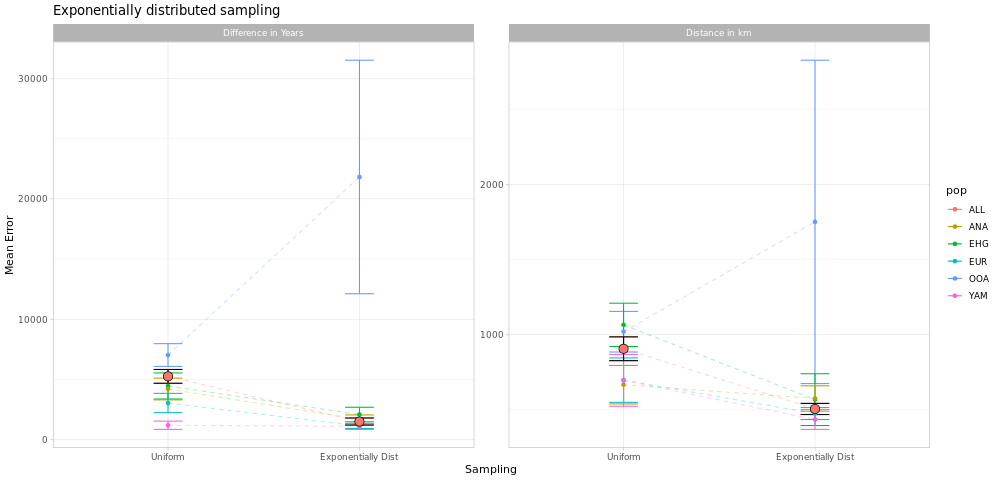

In [15]:
%%R -w 1000

mean_err %>%
    filter(exp %in% c(4, 8)) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = as.factor(exp), y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15) +
    geom_line(aes(color = pop, group = pop), linetype = "dashed", alpha = 0.3) +
    geom_point(aes(color = pop)) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = as.factor(exp), y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(.~stat, scale = "free") +
    theme_light() +
    scale_x_discrete(breaks = c(4, 8), labels = c("Uniform", "Exponentially Dist")) +
    xlab("Sampling") +
    ylab("Mean Error") +
    ggtitle("Exponentially distributed sampling")

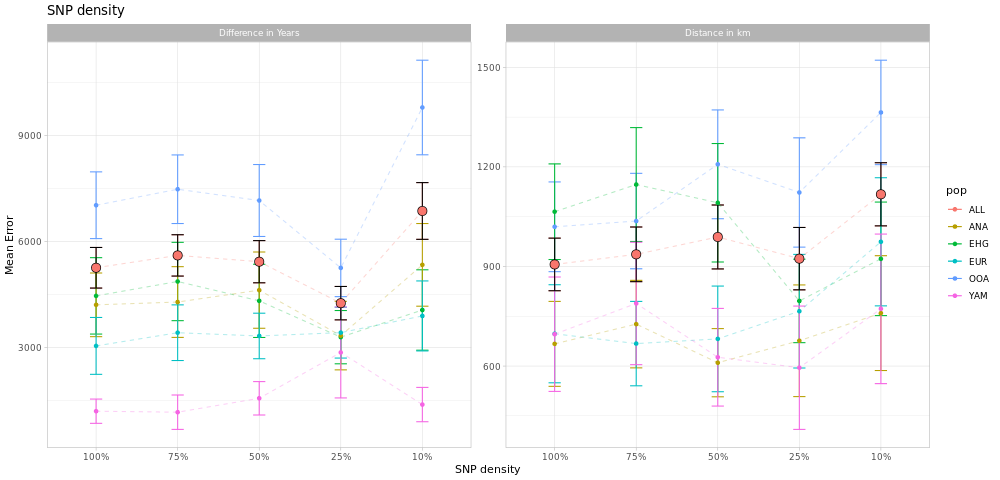

In [16]:
%%R -w 1000

mean_err %>%
    filter(exp %in% c(4, 9, 10, 11, 12)) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = as.factor(exp), y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15) +
    geom_line(aes(color = pop, group = pop), linetype = "dashed", alpha = 0.3) +
    geom_point(aes(color = pop)) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = as.factor(exp), y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(.~stat, scale = "free") +
    theme_light() +
    scale_x_discrete(breaks = c("4", "9", "10", "11", "12"), labels = c("100%", "75%", "50%", "25%", "10%")) +
    xlab("SNP density") +
    ylab("Mean Error") +
    ggtitle("SNP density")

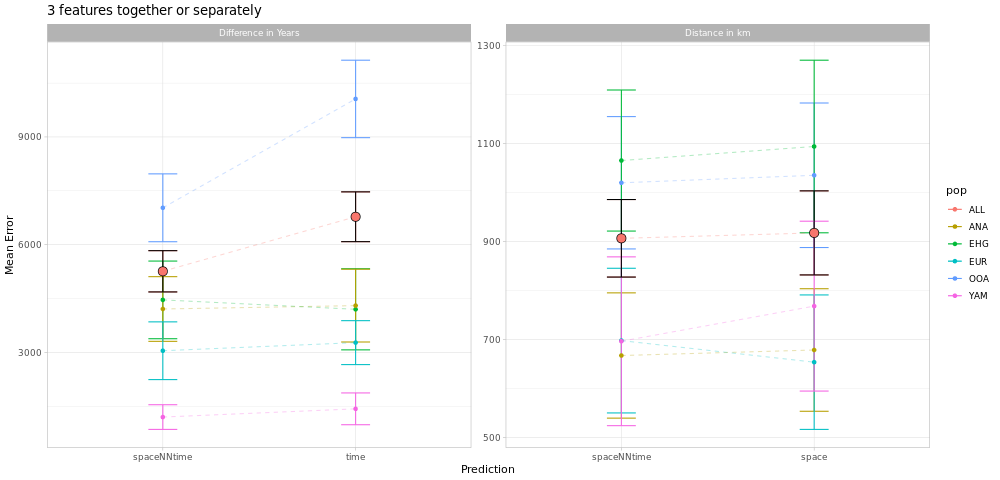

In [17]:
%%R -w 1000

    
mean_err %>%
    filter(exp %in% c(4, 13, 14)) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = as.factor(exp), y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15) +
    geom_line(aes(color = pop, group = pop), linetype = "dashed", alpha = 0.3) +
    geom_point(aes(color = pop)) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = as.factor(exp), y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(.~stat, scale = "free") +
    theme_light() +
    scale_x_discrete(breaks = c("4", "13", "14"), labels = c("spaceNNtime", "space", "time")) +
    xlab("Prediction") +
    ylab("Mean Error") +
    ggtitle("3 features together or separately")

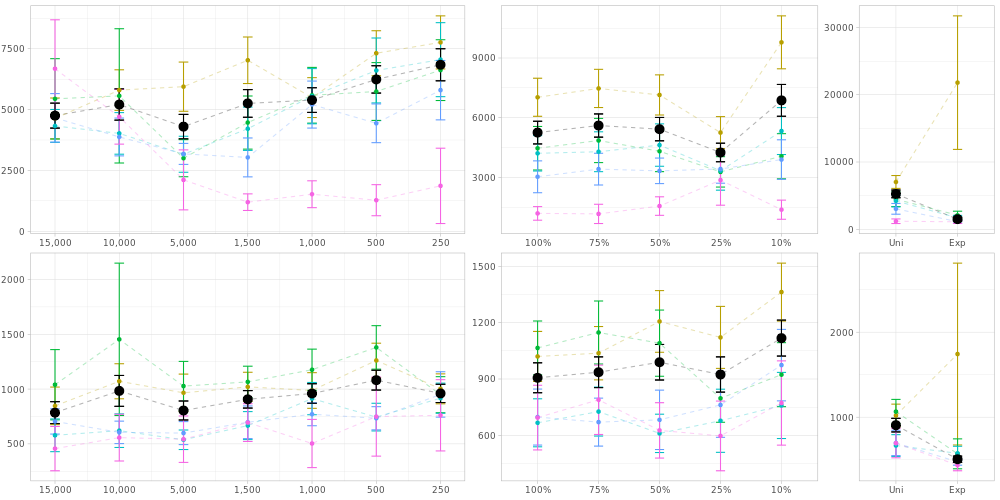

In [36]:
%%R -w 1000 -h 500
plot_grid(
mean_err %>%
    filter(exp < 8) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = exp, y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15, show.legend = FALSE) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15, show.legend = FALSE) +
    geom_line(aes(color = pop), linetype = "dashed", alpha = 0.3, show.legend = FALSE) +
    geom_point(aes(color = pop), show.legend = FALSE) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = exp, y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(stat~., scale = "free", nrow = 2) +
    theme_light() +
    scale_x_continuous(breaks = 1:7, labels = c("15,000", "10,000", "5,000", "1,500", "1,000", "500", "250")) +
    xlab("Sample size") +
    scale_color_manual(values=col_pop) +
    scale_fill_manual(values=col_pop) +
    theme(axis.title = element_blank(), strip.background = element_blank(), strip.text.x = element_blank()),

    
mean_err %>%
    filter(exp %in% c(4, 9, 10, 11, 12)) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = as.factor(exp), y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15) +
    geom_line(aes(color = pop, group = pop), linetype = "dashed", alpha = 0.3) +
    geom_point(aes(color = pop)) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = as.factor(exp), y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(.~stat, scale = "free", ncol = 1) +
    theme_light() +
    theme() +
    scale_x_discrete(breaks = c("4", "9", "10", "11", "12"), labels = c("100%", "75%", "50%", "25%", "10%")) +
    scale_color_manual(values=col_pop) +
    scale_fill_manual(values=col_pop) +
    xlab("SNP density") +
    ylab("Mean Error")+
    theme(axis.title = element_blank(), legend.position="none", strip.background = element_blank(), strip.text.x = element_blank()) ,
    
    
mean_err %>%
    filter(exp %in% c(4, 8)) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = as.factor(exp), y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15) +
    geom_line(aes(color = pop, group = pop), linetype = "dashed", alpha = 0.3) +
    geom_point(aes(color = pop)) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = as.factor(exp), y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(.~stat, scale = "free", ncol = 1) +
    theme_light() +
    scale_x_discrete(breaks = c(4, 8), labels = c("Uni", "Exp")) +
    xlab("Sampling") +
    ylab("Mean Error")+
    scale_color_manual(values=col_pop) +
    scale_fill_manual(values=col_pop) +
    theme(axis.title = element_blank(), legend.position="none", strip.background = element_blank(), strip.text.x = element_blank()), 
    
    
    nrow = 1, rel_widths = c(8, 6, 3)) -> plot1

plot1

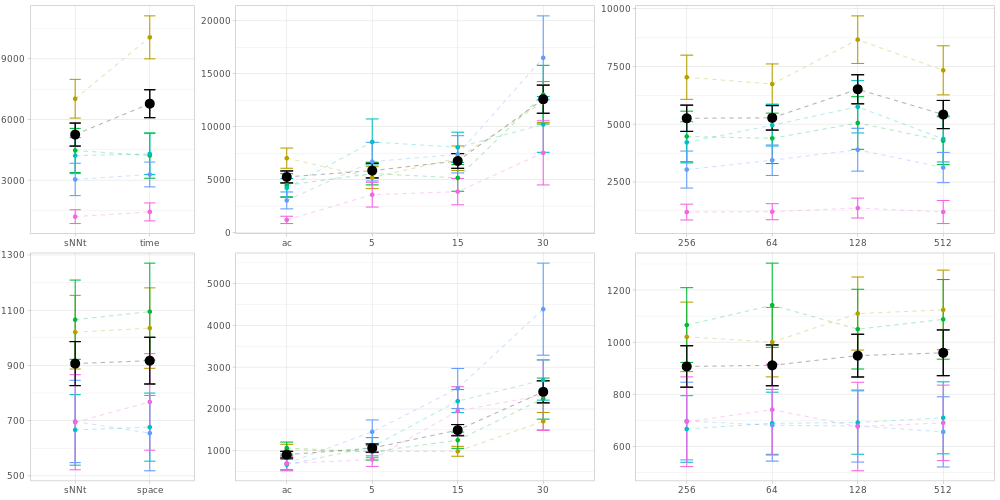

In [47]:
%%R -w 1000 -h 500
plot_grid(
    
mean_err %>%
    filter(exp %in% c(4, 13, 14)) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = as.factor(exp), y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15) +
    geom_line(aes(color = pop, group = pop), linetype = "dashed", alpha = 0.3) +
    geom_point(aes(color = pop)) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = as.factor(exp), y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(.~stat, scale = "free", ncol = 1) +
    theme_light() +
    scale_x_discrete(breaks = c("4", "13", "14"), labels = c("sNNt", "space", "time")) +
    scale_color_manual(values=col_pop) +
    scale_fill_manual(values=col_pop) +
    xlab("Prediction") +
    ylab("Mean Error") +
    theme(axis.title = element_blank(), legend.position="none", strip.background = element_blank(), strip.text.x = element_blank()),
    
mean_err %>%
    filter(exp %in% c(4, 15, 16, 17)) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = as.factor(exp), y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15) +
    geom_line(aes(color = pop, group = pop), linetype = "dashed", alpha = 0.3) +
    geom_point(aes(color = pop)) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = as.factor(exp), y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(.~stat, scale = "free", ncol = 1) +
    theme_light() +
    scale_x_discrete(breaks = c("4", "15", "16", "17"), labels = c("ac", "5", "15", "30")) +
    scale_color_manual(values=col_pop) +
    scale_fill_manual(values=col_pop) +
    xlab("Prediction") +
    ylab("Mean Error") +
    theme(axis.title = element_blank(), legend.position="none", strip.background = element_blank(), strip.text.x = element_blank()),

mean_err %>%
    filter(exp %in% c(18, 19, 4, 20)) %>%
    mutate(stat = ifelse(stat == "diff_years", "Difference in Years", "Distance in km")) %>%
    ggplot(aes(x = as.factor(exp), y = mean)) +
    geom_errorbar(aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se),color = pop), width = 0.15) +
    geom_errorbar(data = . %>% filter(pop == "ALL"), aes(ymin = mean-(1.96*se), ymax = mean+(1.96*se)), color = "black", width = 0.15) +
    geom_line(aes(color = pop, group = pop), linetype = "dashed", alpha = 0.3) +
    geom_point(aes(color = pop)) +
    geom_point(data = . %>% filter(pop == "ALL"), aes(x = as.factor(exp), y = mean, fill = pop), shape = 21, size = 4, show.legend = FALSE) +
    facet_wrap(.~stat, scale = "free", ncol = 1) +
    theme_light() +
    scale_x_discrete(breaks = c("18", "19", "4", "20"), labels = c(256/4, 256/2, 256, 256*2)) +
    scale_color_manual(values=col_pop) +
    scale_fill_manual(values=col_pop) +
    xlab("Prediction") +
    ylab("Mean Error") +
    theme(axis.title = element_blank(), legend.position="none", strip.background = element_blank(), strip.text.x = element_blank()),
    
nrow = 1, rel_widths = c(2, 4, 4)) -> plot2

plot2
    

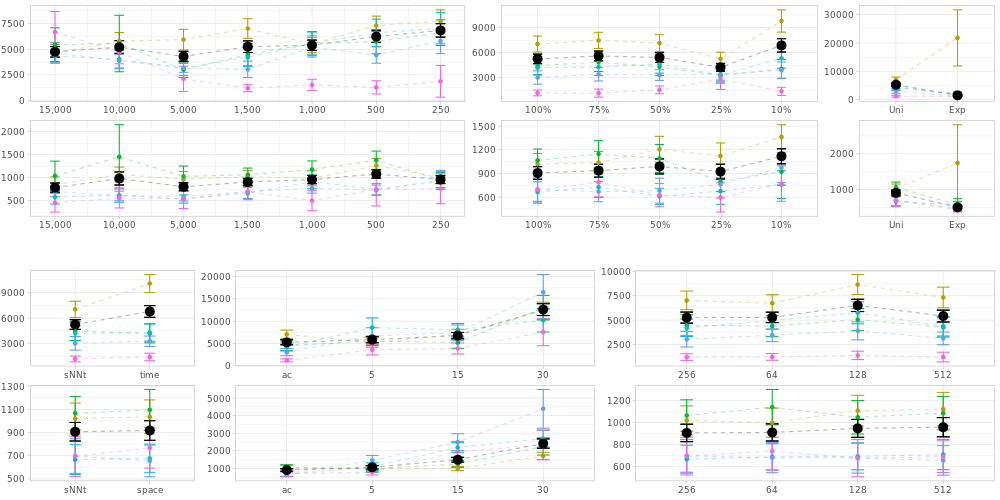

In [48]:
%%R -w 1000 -h 500

plot_grid(plot1, NULL, plot2, nrow = 3, rel_heights = c(8, 1, 8)) -> plot3

plot3

In [49]:
%%R

ggsave("../sandbox/europe/plots/diff.pdf", width = 10, height = 7, dpi = 300, units = "in")

[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

In [18]:
%ls /home/moicoll/spaceNNtime/sandbox/europe/7/pred.txt

/home/moicoll/spaceNNtime/sandbox/europe/7/pred.txt


In [20]:
%%R

read.table("/home/moicoll/spaceNNtime/sandbox/europe/7/pred.txt", header = T) %>%
head()

     sim exp        nam   ind typ group index n_snps real_latitude_norm
1 europe   7 downsample 38456  gt     0    47    574        -0.23714938
2 europe   7 downsample 31417  gt     0   140    574        -0.89458392
3 europe   7 downsample 22694  gt     0   237    574        -0.03076345
4 europe   7 downsample 36567  gt     1   186    574        -0.21553555
5 europe   7 downsample 21767  gt     1   189    574         1.06965326
6 europe   7 downsample  5532  gt     2    81    574         0.69934072
  real_longitude_norm real_time_norm pred_latitude_norm pred_longitude_norm
1          -0.5185430   -1.127156328         -1.0586661          0.07217294
2           1.1113577   -0.648629378         -0.8328766          0.94644900
3          -0.6714638   -0.060555120         -1.0519073         -0.06781173
4           2.2542964   -0.996889741         -0.4742326          1.71227970
5          -0.2208005   -0.008670837         -0.8658125          0.06024784
6          -1.2804507    1.342772039    